In [1]:
import pandas as pd
dataset= pd.read_csv(r"C:\Users\rafi\Desktop\master pro\EB7_by_LA2.csv", encoding= 'unicode_escape', delimiter= ',')
print(dataset)

      AverageFloorArea  Year/Quarter  Property Type  \
0                 14.0             1              5   
1                 14.0             4              1   
2                 19.0             1              4   
3                 20.0             1              1   
4                 20.0             1              2   
...                ...           ...            ...   
1413             145.0             1              3   
1414             145.0             4              3   
1415             146.0             4              1   
1416             147.0             2              3   
1417             147.0             4              3   

      EnergyUseAveragePerDwelling  CarbonDioxideEmissionsAveragePerDwelling  \
0                           356.0                                       1.0   
1                           468.0                                       1.0   
2                           375.0                                       1.0   
3                      

In [2]:
dataset.dtypes

AverageFloorArea                            float64
Year/Quarter                                  int64
Property Type                                 int64
EnergyUseAveragePerDwelling                 float64
CarbonDioxideEmissionsAveragePerDwelling    float64
LightingCostAveragePerDwelling              float64
HeatingCostAveragePerDwelling               float64
HotWaterCostAveragePerDwelling              float64
dtype: object

In [3]:
del dataset['LightingCostAveragePerDwelling']
del dataset['HeatingCostAveragePerDwelling']
del dataset['CarbonDioxideEmissionsAveragePerDwelling']

In [4]:
dataset

,AverageFloorArea,Year/Quarter,Property Type,EnergyUseAveragePerDwelling,HotWaterCostAveragePerDwelling
0,14.0,1,5,356.0,107.0
1,14.0,4,1,468.0,143.0
2,19.0,1,4,375.0,63.0
3,20.0,1,1,447.0,184.0
4,20.0,1,2,366.0,128.0
...,...,...,...,...,...
1413,145.0,1,3,241.0,145.0
1414,145.0,4,3,227.0,141.0
1415,146.0,4,1,234.0,130.0
1416,147.0,2,3,233.0,155.0


In [5]:
dataset['EnergyUseAveragePerDwelling'] = dataset['EnergyUseAveragePerDwelling'].astype(int)
dataset['AverageFloorArea'] = dataset['AverageFloorArea'].astype(int)
dataset['HotWaterCostAveragePerDwelling'] = dataset['HotWaterCostAveragePerDwelling'].astype(int)
dataset

,AverageFloorArea,Year/Quarter,Property Type,EnergyUseAveragePerDwelling,HotWaterCostAveragePerDwelling
0,14,1,5,356,107
1,14,4,1,468,143
2,19,1,4,375,63
3,20,1,1,447,184
4,20,1,2,366,128
...,...,...,...,...,...
1413,145,1,3,241,145
1414,145,4,3,227,141
1415,146,4,1,234,130
1416,147,2,3,233,155


In [6]:
from sklearn.model_selection import train_test_split
X=dataset.drop('HotWaterCostAveragePerDwelling',axis=1)
Y=dataset['HotWaterCostAveragePerDwelling']
X_train, X_test, Y_train, Y_test =train_test_split(X,Y, test_size=0.3, random_state = 0)
X_train

,AverageFloorArea,Year/Quarter,Property Type,EnergyUseAveragePerDwelling
565,67,3,1,309
828,83,3,1,302
759,79,3,2,266
1385,134,4,4,271
165,42,4,2,302
...,...,...,...,...
763,79,4,1,315
835,83,4,5,219
1216,113,3,1,260
559,67,1,4,296


## Naive bias

In [17]:
from sklearn.naive_bayes import GaussianNB
NB_model=GaussianNB()
NB_model.fit(X_train.values,Y_train.values)

GaussianNB()

In [18]:
prediction = NB_model.predict([[80,2,2,129]])
print("Prediction: {}".format(prediction))

Prediction: [163]


In [19]:
from sklearn.metrics import r2_score
r2_score(Y_test, NB_model.predict(X_test.values))

-0.9137089549489215

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse= mean_squared_error(Y_test, NB_model.predict(X_test.values))
mae= mean_absolute_error(Y_test, NB_model.predict(X_test.values))
print('mean squired error:', mse)
print('mean absolute error:', mae)

mean squired error: 982.2699530516431
mean absolute error: 20.392018779342724


Text(0.5, 1.0, 'Actual vs predicted')

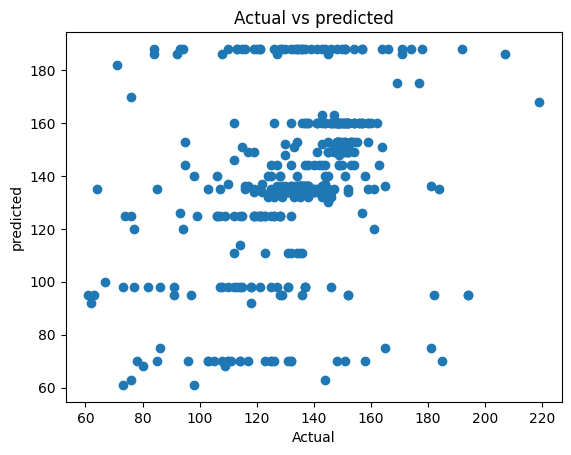

In [21]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, NB_model.predict(X_test.values))
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title("Actual vs predicted")

In [22]:
y_prd=NB_model.predict(X_test.values)
predic_dif=pd.DataFrame({'Actual':Y_test,'predict':y_prd,"differences":Y_test-y_prd})
predic_dif[0:15]

,Actual,predict,differences
431,107,125,-18
610,125,125,0
795,132,135,-3
1238,157,160,-3
1228,153,153,0
794,116,135,-19
642,128,125,3
416,135,134,1
1410,115,151,-36
517,140,134,6


## Linear regression

In [23]:
from sklearn import linear_model
lr_model=linear_model.LinearRegression()
lr_model.fit(X_train.values,Y_train.values)

LinearRegression()

In [24]:
prediction = lr_model.predict([[80,2,2,129]])
print("Prediction: {}".format(prediction))

Prediction: [122.85336733]


In [25]:
from sklearn.metrics import r2_score
r2_score(Y_test, lr_model.predict(X_test.values))

0.1631194358442669

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse= mean_squared_error(Y_test, lr_model.predict(X_test.values))
mae= mean_absolute_error(Y_test, lr_model.predict(X_test.values))
print('mean squired error:', mse)
print('mean absolute error:', mae)

mean squired error: 429.5546772340968
mean absolute error: 14.36788737228124


Text(0.5, 1.0, 'Actual vs predicted')

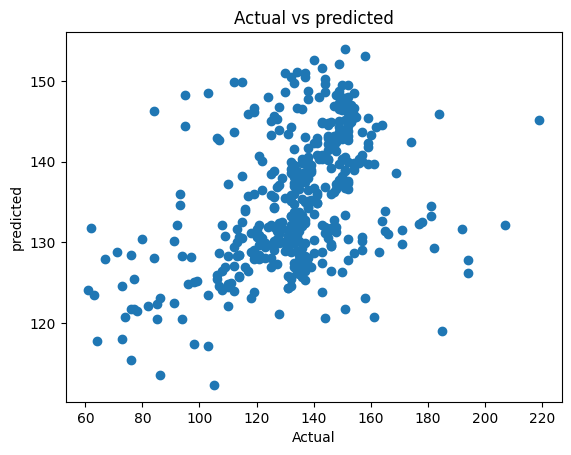

In [27]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, lr_model.predict(X_test.values))
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title("Actual vs predicted")

In [28]:
y_prd=lr_model.predict(X_test.values)
predic_dif=pd.DataFrame({'Actual':Y_test,'predict':y_prd,"differences":Y_test-y_prd})
predic_dif[0:15]

,Actual,predict,differences
431,107,128.662197,-21.662197
610,125,132.100121,-7.100121
795,132,135.125459,-3.125459
1238,157,143.658598,13.341402
1228,153,145.011060,7.988940
794,116,134.089066,-18.089066
642,128,132.400352,-4.400352
416,135,127.761822,7.238178
1410,115,149.863045,-34.863045
517,140,128.638028,11.361972


## Rabdom forest

In [7]:
from sklearn.ensemble import RandomForestRegressor
RF= RandomForestRegressor(n_estimators=200,random_state=30)
RF.fit(X_train.values,Y_train.values)
prediction = RF.predict([[80,2,2,129]])
print("Prediction: {}".format(prediction))

Prediction: [123.06]


In [47]:
from sklearn.metrics import r2_score
r2_score(Y_test, RF.predict(X_test.values))

0.2961631281349527

In [48]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse= mean_squared_error(Y_test, RF.predict(X_test.values))
mae= mean_absolute_error(Y_test, RF.predict(X_test.values))
print('mean squired error:', mse)
print('mean absolute error:', mae)

mean squired error: 361.26591208920183
mean absolute error: 10.899882629107982


Text(0.5, 1.0, 'Actual vs predicted')

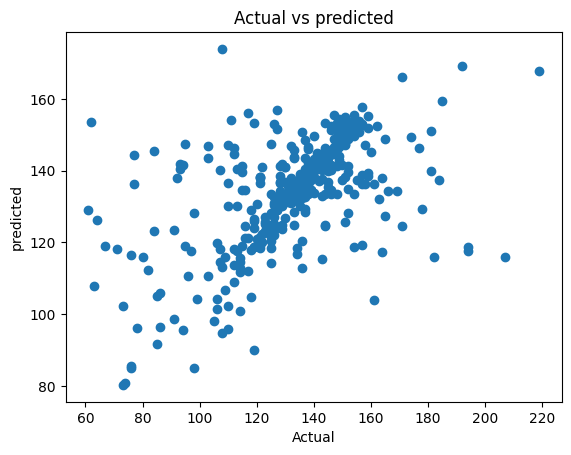

In [49]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, RF.predict(X_test.values))
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title("Actual vs predicted")

In [50]:
y_prd=RF.predict(X_test.values)
predic_dif=pd.DataFrame({'Actual':Y_test,'predict':y_prd,"differences":Y_test-y_prd})
predic_dif[0:15]

,Actual,predict,differences
431,107,118.050,-11.050
610,125,128.090,-3.090
795,132,136.525,-4.525
1238,157,152.945,4.055
1228,153,150.930,2.070
794,116,124.555,-8.555
642,128,130.605,-2.605
416,135,134.600,0.400
1410,115,134.645,-19.645
517,140,142.385,-2.385


## KNN

In [51]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=30)
knn.fit(X_train.values,Y_train.values)
prediction = knn.predict([[80,2,2,129]])
print("Prediction: {}".format(prediction))

Prediction: [136.13333333]


In [52]:
from sklearn.metrics import r2_score
r2_score(Y_test, knn.predict(X_test.values))

0.20758405084992793

In [53]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse= mean_squared_error(Y_test, knn.predict(X_test.values))
mae= mean_absolute_error(Y_test, knn.predict(X_test.values))
print('mean squired error:', mse)
print('mean absolute error:', mae)

mean squired error: 406.73184663536773
mean absolute error: 12.830203442879498


Text(0.5, 1.0, 'Actual vs predicted')

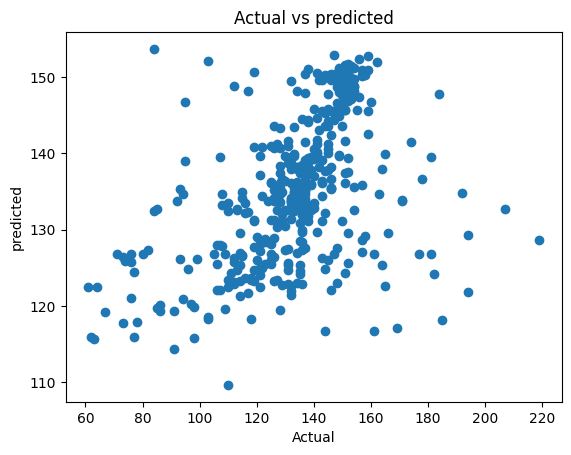

In [54]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, knn.predict(X_test.values))
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title("Actual vs predicted")

In [55]:
y_prd=knn.predict(X_test.values)
predic_dif=pd.DataFrame({'Actual':Y_test,'predict':y_prd,"differences":Y_test-y_prd})
predic_dif[0:15]

,Actual,predict,differences
431,107,122.133333,-15.133333
610,125,131.233333,-6.233333
795,132,133.733333,-1.733333
1238,157,150.300000,6.700000
1228,153,148.300000,4.700000
794,116,133.433333,-17.433333
642,128,133.633333,-5.633333
416,135,133.033333,1.966667
1410,115,134.133333,-19.133333
517,140,140.600000,-0.600000


## CNN

In [56]:
from keras.layers import Dense, Dropout,Activation, Conv1D,MaxPooling1D,Flatten
from keras.models import Sequential
model1=Sequential()
model1.add(Conv1D(64, kernel_size=1, activation='relu', name='Conv1D_1',input_shape=(X_train.shape[1],1)))
model1.add(Dropout(0.2))
model1.add(Conv1D(32, kernel_size=1, activation='relu', name='Conv1D_2'))
model1.add(Conv1D(16, kernel_size=1, activation='relu', name='Conv1D_3'))
model1.add(MaxPooling1D(pool_size=1,name="maxpooling_2"))
model1.add(Flatten())
model1.add(Dense(32, activation='linear',name='Dense_1'))
model1.add(Dense(units=1))
model1.compile(loss='mean_squared_error',optimizer='adam', metrics=['mae'])
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1D_1 (Conv1D)           (None, 4, 64)             128       
                                                                 
 dropout (Dropout)           (None, 4, 64)             0         
                                                                 
 Conv1D_2 (Conv1D)           (None, 4, 32)             2080      
                                                                 
 Conv1D_3 (Conv1D)           (None, 4, 16)             528       
                                                                 
 maxpooling_2 (MaxPooling1D)  (None, 4, 16)            0         
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 Dense_1 (Dense)             (None, 32)                2

In [57]:
model1.fit(X_train,Y_train ,epochs =2000,batch_size=32,validation_split=0.3)

Epoch 1/2000
22/22 [==============================] - 6s 58ms/step - loss: 4391.0898 - mae: 53.7993 - val_loss: 1569.1212 - val_mae: 30.1147
Epoch 2/2000
22/22 [==============================] - 0s 13ms/step - loss: 1154.4421 - mae: 25.7752 - val_loss: 698.6661 - val_mae: 19.9565
Epoch 3/2000
22/22 [==============================] - 0s 8ms/step - loss: 826.5436 - mae: 21.7036 - val_loss: 569.9807 - val_mae: 16.3950
Epoch 4/2000
22/22 [==============================] - 0s 9ms/step - loss: 684.8917 - mae: 18.9485 - val_loss: 502.6050 - val_mae: 14.5055
Epoch 5/2000
22/22 [==============================] - 0s 13ms/step - loss: 644.3937 - mae: 18.4471 - val_loss: 460.4178 - val_mae: 14.8476
Epoch 6/2000
22/22 [==============================] - 0s 12ms/step - loss: 571.5035 - mae: 17.3541 - val_loss: 461.6681 - val_mae: 15.5316
Epoch 7/2000
22/22 [==============================] - 0s 10ms/step - loss: 573.0080 - mae: 17.4333 - val_loss: 429.4223 - val_mae: 14.3408
Epoch 8/2000
22/22 [======

Epoch 118/2000
22/22 [==============================] - 0s 6ms/step - loss: 372.9995 - mae: 13.4347 - val_loss: 459.2321 - val_mae: 17.0743
Epoch 119/2000
22/22 [==============================] - 0s 12ms/step - loss: 337.3182 - mae: 12.7293 - val_loss: 577.7142 - val_mae: 20.2263
Epoch 120/2000
22/22 [==============================] - 0s 10ms/step - loss: 374.7990 - mae: 13.7167 - val_loss: 392.5020 - val_mae: 14.5662
Epoch 121/2000
22/22 [==============================] - 0s 11ms/step - loss: 348.2187 - mae: 12.8652 - val_loss: 449.8882 - val_mae: 16.7712
Epoch 122/2000
22/22 [==============================] - 0s 8ms/step - loss: 354.4827 - mae: 13.1725 - val_loss: 419.5620 - val_mae: 15.7583
Epoch 123/2000
22/22 [==============================] - 0s 8ms/step - loss: 338.5388 - mae: 12.7377 - val_loss: 482.2407 - val_mae: 17.7718
Epoch 124/2000
22/22 [==============================] - 0s 7ms/step - loss: 343.5799 - mae: 12.7805 - val_loss: 496.9184 - val_mae: 18.1838
Epoch 125/2000
22

22/22 [==============================] - 0s 8ms/step - loss: 340.9044 - mae: 12.7788 - val_loss: 430.3286 - val_mae: 16.2461
Epoch 235/2000
22/22 [==============================] - 0s 10ms/step - loss: 335.7711 - mae: 12.5508 - val_loss: 455.0759 - val_mae: 17.1164
Epoch 236/2000
22/22 [==============================] - 0s 10ms/step - loss: 339.6506 - mae: 12.7549 - val_loss: 410.6388 - val_mae: 15.6097
Epoch 237/2000
22/22 [==============================] - 0s 10ms/step - loss: 339.5403 - mae: 12.5529 - val_loss: 459.2701 - val_mae: 17.2038
Epoch 238/2000
22/22 [==============================] - 0s 10ms/step - loss: 337.9509 - mae: 12.6261 - val_loss: 423.0150 - val_mae: 16.0145
Epoch 239/2000
22/22 [==============================] - 0s 10ms/step - loss: 345.5292 - mae: 12.8495 - val_loss: 411.0507 - val_mae: 15.5821
Epoch 240/2000
22/22 [==============================] - 0s 10ms/step - loss: 341.2153 - mae: 12.8085 - val_loss: 455.5216 - val_mae: 17.1182
Epoch 241/2000
22/22 [=======

22/22 [==============================] - 0s 12ms/step - loss: 345.2355 - mae: 12.8992 - val_loss: 404.7379 - val_mae: 15.3340
Epoch 351/2000
22/22 [==============================] - 0s 9ms/step - loss: 339.6379 - mae: 12.8259 - val_loss: 431.3985 - val_mae: 16.3507
Epoch 352/2000
22/22 [==============================] - 0s 7ms/step - loss: 340.3299 - mae: 12.7639 - val_loss: 413.2117 - val_mae: 15.7196
Epoch 353/2000
22/22 [==============================] - 0s 9ms/step - loss: 332.2773 - mae: 12.3908 - val_loss: 412.6079 - val_mae: 15.6767
Epoch 354/2000
22/22 [==============================] - 0s 7ms/step - loss: 333.3426 - mae: 12.4086 - val_loss: 424.3188 - val_mae: 16.1091
Epoch 355/2000
22/22 [==============================] - 0s 8ms/step - loss: 330.9106 - mae: 12.5025 - val_loss: 458.7483 - val_mae: 17.2512
Epoch 356/2000
22/22 [==============================] - 0s 9ms/step - loss: 339.7390 - mae: 12.7463 - val_loss: 395.3706 - val_mae: 15.0078
Epoch 357/2000
22/22 [============

22/22 [==============================] - 0s 14ms/step - loss: 327.6168 - mae: 12.2954 - val_loss: 443.2150 - val_mae: 16.9087
Epoch 467/2000
22/22 [==============================] - 0s 10ms/step - loss: 322.4422 - mae: 12.1430 - val_loss: 407.5151 - val_mae: 15.6562
Epoch 468/2000
22/22 [==============================] - 0s 13ms/step - loss: 333.2438 - mae: 12.4720 - val_loss: 493.4609 - val_mae: 18.2906
Epoch 469/2000
22/22 [==============================] - 0s 10ms/step - loss: 327.1862 - mae: 12.2711 - val_loss: 394.8017 - val_mae: 15.1707
Epoch 470/2000
22/22 [==============================] - 0s 11ms/step - loss: 336.1931 - mae: 12.5277 - val_loss: 406.7674 - val_mae: 15.7105
Epoch 471/2000
22/22 [==============================] - 0s 8ms/step - loss: 321.7191 - mae: 12.1844 - val_loss: 390.5488 - val_mae: 15.0428
Epoch 472/2000
22/22 [==============================] - 0s 9ms/step - loss: 325.1137 - mae: 12.0789 - val_loss: 419.8793 - val_mae: 16.1443
Epoch 473/2000
22/22 [========

22/22 [==============================] - 0s 10ms/step - loss: 318.8107 - mae: 12.0905 - val_loss: 460.1732 - val_mae: 17.3607
Epoch 583/2000
22/22 [==============================] - 0s 10ms/step - loss: 316.7529 - mae: 11.9165 - val_loss: 454.2570 - val_mae: 17.1319
Epoch 584/2000
22/22 [==============================] - 0s 9ms/step - loss: 312.9530 - mae: 11.9650 - val_loss: 387.9372 - val_mae: 14.9822
Epoch 585/2000
22/22 [==============================] - 0s 15ms/step - loss: 329.8334 - mae: 12.3276 - val_loss: 468.1816 - val_mae: 17.5220
Epoch 586/2000
22/22 [==============================] - 0s 12ms/step - loss: 320.2718 - mae: 12.0202 - val_loss: 513.2059 - val_mae: 18.8063
Epoch 587/2000
22/22 [==============================] - 0s 14ms/step - loss: 329.0184 - mae: 12.4129 - val_loss: 412.5602 - val_mae: 15.9476
Epoch 588/2000
22/22 [==============================] - 0s 12ms/step - loss: 318.9844 - mae: 11.9863 - val_loss: 403.6885 - val_mae: 15.5844
Epoch 589/2000
22/22 [=======

22/22 [==============================] - 0s 14ms/step - loss: 324.8174 - mae: 12.3368 - val_loss: 439.5477 - val_mae: 16.7597
Epoch 699/2000
22/22 [==============================] - 0s 12ms/step - loss: 320.2587 - mae: 11.8768 - val_loss: 379.3777 - val_mae: 14.6710
Epoch 700/2000
22/22 [==============================] - 0s 10ms/step - loss: 338.3838 - mae: 12.7695 - val_loss: 499.9370 - val_mae: 18.4648
Epoch 701/2000
22/22 [==============================] - 0s 18ms/step - loss: 330.4134 - mae: 12.3099 - val_loss: 434.0432 - val_mae: 16.6061
Epoch 702/2000
22/22 [==============================] - 0s 10ms/step - loss: 314.2495 - mae: 11.8429 - val_loss: 484.8234 - val_mae: 18.0576
Epoch 703/2000
22/22 [==============================] - 0s 9ms/step - loss: 322.4196 - mae: 12.0976 - val_loss: 392.6232 - val_mae: 15.1886
Epoch 704/2000
22/22 [==============================] - 0s 11ms/step - loss: 312.3339 - mae: 11.8696 - val_loss: 434.9281 - val_mae: 16.6069
Epoch 705/2000
22/22 [=======

22/22 [==============================] - 0s 12ms/step - loss: 317.2866 - mae: 11.9025 - val_loss: 452.1634 - val_mae: 17.1624
Epoch 815/2000
22/22 [==============================] - 0s 10ms/step - loss: 314.7401 - mae: 11.9798 - val_loss: 427.1443 - val_mae: 16.4354
Epoch 816/2000
22/22 [==============================] - 0s 11ms/step - loss: 313.9508 - mae: 11.8916 - val_loss: 435.2752 - val_mae: 16.6924
Epoch 817/2000
22/22 [==============================] - 0s 11ms/step - loss: 313.4650 - mae: 11.7978 - val_loss: 443.6053 - val_mae: 16.9432
Epoch 818/2000
22/22 [==============================] - 0s 9ms/step - loss: 311.7469 - mae: 11.8627 - val_loss: 410.1009 - val_mae: 15.8805
Epoch 819/2000
22/22 [==============================] - 0s 12ms/step - loss: 311.9239 - mae: 11.6507 - val_loss: 447.2915 - val_mae: 17.0703
Epoch 820/2000
22/22 [==============================] - 0s 9ms/step - loss: 317.2365 - mae: 11.9472 - val_loss: 462.6370 - val_mae: 17.4817
Epoch 821/2000
22/22 [========

22/22 [==============================] - 0s 15ms/step - loss: 309.1073 - mae: 11.8001 - val_loss: 425.8145 - val_mae: 16.4898
Epoch 931/2000
22/22 [==============================] - 0s 13ms/step - loss: 309.7602 - mae: 11.8837 - val_loss: 426.3924 - val_mae: 16.5244
Epoch 932/2000
22/22 [==============================] - 0s 12ms/step - loss: 303.4479 - mae: 11.5862 - val_loss: 442.7913 - val_mae: 16.9975
Epoch 933/2000
22/22 [==============================] - 0s 12ms/step - loss: 306.7618 - mae: 11.7761 - val_loss: 400.8681 - val_mae: 15.7146
Epoch 934/2000
22/22 [==============================] - 0s 10ms/step - loss: 307.5097 - mae: 11.8519 - val_loss: 392.8064 - val_mae: 15.4256
Epoch 935/2000
22/22 [==============================] - 0s 11ms/step - loss: 309.9549 - mae: 11.8332 - val_loss: 390.6446 - val_mae: 15.4129
Epoch 936/2000
22/22 [==============================] - 0s 10ms/step - loss: 303.9610 - mae: 11.6195 - val_loss: 411.0861 - val_mae: 16.1009
Epoch 937/2000
22/22 [======

Epoch 1046/2000
22/22 [==============================] - 0s 22ms/step - loss: 306.3503 - mae: 11.7790 - val_loss: 455.1073 - val_mae: 17.5313
Epoch 1047/2000
22/22 [==============================] - 0s 16ms/step - loss: 305.2331 - mae: 11.6443 - val_loss: 429.9110 - val_mae: 16.8616
Epoch 1048/2000
22/22 [==============================] - 0s 14ms/step - loss: 313.2946 - mae: 11.7133 - val_loss: 440.1622 - val_mae: 17.1515
Epoch 1049/2000
22/22 [==============================] - 0s 22ms/step - loss: 308.1413 - mae: 11.8107 - val_loss: 440.8895 - val_mae: 17.1409
Epoch 1050/2000
22/22 [==============================] - 0s 15ms/step - loss: 311.5316 - mae: 11.8737 - val_loss: 378.8053 - val_mae: 15.1629
Epoch 1051/2000
22/22 [==============================] - 0s 16ms/step - loss: 312.4428 - mae: 12.0464 - val_loss: 375.0685 - val_mae: 14.9857
Epoch 1052/2000
22/22 [==============================] - 0s 17ms/step - loss: 312.8775 - mae: 12.0407 - val_loss: 485.3184 - val_mae: 18.4359
Epoch 

Epoch 1104/2000
22/22 [==============================] - 0s 14ms/step - loss: 303.7923 - mae: 11.7573 - val_loss: 468.7799 - val_mae: 18.0186
Epoch 1105/2000
22/22 [==============================] - 0s 12ms/step - loss: 302.9442 - mae: 11.5722 - val_loss: 401.4825 - val_mae: 15.9931
Epoch 1106/2000
22/22 [==============================] - 0s 20ms/step - loss: 303.2678 - mae: 11.6446 - val_loss: 416.5298 - val_mae: 16.4372
Epoch 1107/2000
22/22 [==============================] - 0s 12ms/step - loss: 300.1913 - mae: 11.5665 - val_loss: 442.7327 - val_mae: 17.2578
Epoch 1108/2000
22/22 [==============================] - 0s 15ms/step - loss: 303.7659 - mae: 11.6417 - val_loss: 458.5743 - val_mae: 17.7299
Epoch 1109/2000
22/22 [==============================] - 0s 12ms/step - loss: 310.8804 - mae: 11.7996 - val_loss: 396.1734 - val_mae: 15.7983
Epoch 1110/2000
22/22 [==============================] - 0s 13ms/step - loss: 314.7152 - mae: 12.0305 - val_loss: 446.9253 - val_mae: 17.4164
Epoch 

Epoch 1162/2000
22/22 [==============================] - 0s 13ms/step - loss: 307.3174 - mae: 11.5629 - val_loss: 489.8106 - val_mae: 18.5337
Epoch 1163/2000
22/22 [==============================] - 0s 17ms/step - loss: 315.5270 - mae: 12.0203 - val_loss: 447.5361 - val_mae: 17.4299
Epoch 1164/2000
22/22 [==============================] - 0s 13ms/step - loss: 298.1969 - mae: 11.5101 - val_loss: 437.4207 - val_mae: 17.0951
Epoch 1165/2000
22/22 [==============================] - 0s 14ms/step - loss: 311.7928 - mae: 11.8593 - val_loss: 464.9596 - val_mae: 17.8970
Epoch 1166/2000
22/22 [==============================] - 0s 12ms/step - loss: 302.6251 - mae: 11.6009 - val_loss: 454.2843 - val_mae: 17.6132
Epoch 1167/2000
22/22 [==============================] - 0s 15ms/step - loss: 312.8209 - mae: 12.0270 - val_loss: 472.9333 - val_mae: 18.1276
Epoch 1168/2000
22/22 [==============================] - 0s 15ms/step - loss: 306.9314 - mae: 11.7569 - val_loss: 440.0091 - val_mae: 17.1892
Epoch 

Epoch 1220/2000
22/22 [==============================] - 0s 12ms/step - loss: 312.7015 - mae: 11.9347 - val_loss: 509.9670 - val_mae: 19.0767
Epoch 1221/2000
22/22 [==============================] - 0s 17ms/step - loss: 306.6025 - mae: 11.6668 - val_loss: 410.0341 - val_mae: 16.2295
Epoch 1222/2000
22/22 [==============================] - 0s 12ms/step - loss: 315.0356 - mae: 12.0230 - val_loss: 460.6275 - val_mae: 17.7584
Epoch 1223/2000
22/22 [==============================] - 0s 11ms/step - loss: 309.7653 - mae: 11.7810 - val_loss: 524.0399 - val_mae: 19.3620
Epoch 1224/2000
22/22 [==============================] - 0s 16ms/step - loss: 307.8376 - mae: 11.7080 - val_loss: 451.9521 - val_mae: 17.4956
Epoch 1225/2000
22/22 [==============================] - 0s 10ms/step - loss: 301.0846 - mae: 11.5944 - val_loss: 537.0154 - val_mae: 19.7195
Epoch 1226/2000
22/22 [==============================] - 0s 16ms/step - loss: 298.7312 - mae: 11.6158 - val_loss: 536.4255 - val_mae: 19.7128
Epoch 

Epoch 1278/2000
22/22 [==============================] - 0s 16ms/step - loss: 309.2651 - mae: 12.0075 - val_loss: 397.9167 - val_mae: 15.8574
Epoch 1279/2000
22/22 [==============================] - 0s 10ms/step - loss: 306.8285 - mae: 11.6809 - val_loss: 393.5730 - val_mae: 15.8140
Epoch 1280/2000
22/22 [==============================] - 0s 16ms/step - loss: 298.9146 - mae: 11.4728 - val_loss: 445.9779 - val_mae: 17.4620
Epoch 1281/2000
22/22 [==============================] - 0s 12ms/step - loss: 305.7806 - mae: 11.7611 - val_loss: 434.6020 - val_mae: 17.0738
Epoch 1282/2000
22/22 [==============================] - 0s 19ms/step - loss: 305.1716 - mae: 11.6676 - val_loss: 485.9672 - val_mae: 18.4298
Epoch 1283/2000
22/22 [==============================] - 0s 13ms/step - loss: 301.5028 - mae: 11.5690 - val_loss: 455.5913 - val_mae: 17.5797
Epoch 1284/2000
22/22 [==============================] - 0s 11ms/step - loss: 301.5779 - mae: 11.6177 - val_loss: 410.5864 - val_mae: 16.2578
Epoch 

Epoch 1336/2000
22/22 [==============================] - 0s 13ms/step - loss: 303.6151 - mae: 11.7449 - val_loss: 413.4011 - val_mae: 16.4066
Epoch 1337/2000
22/22 [==============================] - 0s 11ms/step - loss: 304.7284 - mae: 11.7043 - val_loss: 429.1610 - val_mae: 16.8668
Epoch 1338/2000
22/22 [==============================] - 0s 11ms/step - loss: 302.5883 - mae: 11.5623 - val_loss: 482.2346 - val_mae: 18.4156
Epoch 1339/2000
22/22 [==============================] - 0s 9ms/step - loss: 300.2318 - mae: 11.5494 - val_loss: 465.9802 - val_mae: 17.9701
Epoch 1340/2000
22/22 [==============================] - 0s 16ms/step - loss: 299.0750 - mae: 11.4740 - val_loss: 495.0665 - val_mae: 18.7131
Epoch 1341/2000
22/22 [==============================] - 0s 8ms/step - loss: 300.4951 - mae: 11.6458 - val_loss: 497.0230 - val_mae: 18.7762
Epoch 1342/2000
22/22 [==============================] - 0s 11ms/step - loss: 301.5950 - mae: 11.8628 - val_loss: 485.9738 - val_mae: 18.4585
Epoch 13

Epoch 1394/2000
22/22 [==============================] - 0s 17ms/step - loss: 301.9640 - mae: 11.7325 - val_loss: 436.5604 - val_mae: 17.1749
Epoch 1395/2000
22/22 [==============================] - 0s 10ms/step - loss: 302.7231 - mae: 11.5118 - val_loss: 412.1990 - val_mae: 16.4128
Epoch 1396/2000
22/22 [==============================] - 0s 20ms/step - loss: 303.8022 - mae: 11.6097 - val_loss: 491.4498 - val_mae: 18.6678
Epoch 1397/2000
22/22 [==============================] - 0s 10ms/step - loss: 304.9200 - mae: 11.7074 - val_loss: 462.8337 - val_mae: 17.8079
Epoch 1398/2000
22/22 [==============================] - 0s 14ms/step - loss: 303.0584 - mae: 11.6021 - val_loss: 444.8432 - val_mae: 17.3764
Epoch 1399/2000
22/22 [==============================] - 0s 15ms/step - loss: 300.2307 - mae: 11.4358 - val_loss: 488.1439 - val_mae: 18.5958
Epoch 1400/2000
22/22 [==============================] - 0s 12ms/step - loss: 304.0696 - mae: 11.6979 - val_loss: 529.2498 - val_mae: 19.5919
Epoch 

Epoch 1452/2000
22/22 [==============================] - 0s 12ms/step - loss: 302.0240 - mae: 11.6504 - val_loss: 452.3641 - val_mae: 17.5150
Epoch 1453/2000
22/22 [==============================] - 0s 10ms/step - loss: 303.8642 - mae: 11.6825 - val_loss: 399.8368 - val_mae: 15.9356
Epoch 1454/2000
22/22 [==============================] - 0s 15ms/step - loss: 299.6803 - mae: 11.5638 - val_loss: 432.4596 - val_mae: 17.0196
Epoch 1455/2000
22/22 [==============================] - 0s 12ms/step - loss: 299.4981 - mae: 11.4349 - val_loss: 510.9256 - val_mae: 19.1938
Epoch 1456/2000
22/22 [==============================] - 0s 11ms/step - loss: 302.1957 - mae: 11.6344 - val_loss: 452.1220 - val_mae: 17.6539
Epoch 1457/2000
22/22 [==============================] - 0s 12ms/step - loss: 303.8640 - mae: 11.5598 - val_loss: 456.6186 - val_mae: 17.6977
Epoch 1458/2000
22/22 [==============================] - 0s 17ms/step - loss: 299.2132 - mae: 11.4789 - val_loss: 554.5828 - val_mae: 20.2665
Epoch 

Epoch 1510/2000
22/22 [==============================] - 0s 14ms/step - loss: 302.5836 - mae: 11.4881 - val_loss: 410.5384 - val_mae: 16.3560
Epoch 1511/2000
22/22 [==============================] - 0s 12ms/step - loss: 304.8931 - mae: 11.4372 - val_loss: 428.4840 - val_mae: 17.0013
Epoch 1512/2000
22/22 [==============================] - 0s 21ms/step - loss: 297.9968 - mae: 11.3997 - val_loss: 468.7101 - val_mae: 18.0914
Epoch 1513/2000
22/22 [==============================] - 0s 12ms/step - loss: 303.3391 - mae: 11.7235 - val_loss: 401.8827 - val_mae: 16.0172
Epoch 1514/2000
22/22 [==============================] - 0s 12ms/step - loss: 302.3775 - mae: 11.6267 - val_loss: 406.4898 - val_mae: 16.2961
Epoch 1515/2000
22/22 [==============================] - 0s 14ms/step - loss: 300.3850 - mae: 11.4698 - val_loss: 500.4093 - val_mae: 18.9326
Epoch 1516/2000
22/22 [==============================] - 0s 11ms/step - loss: 299.2482 - mae: 11.4360 - val_loss: 459.8607 - val_mae: 17.8928
Epoch 

Epoch 1568/2000
22/22 [==============================] - 0s 12ms/step - loss: 297.8972 - mae: 11.5595 - val_loss: 399.3420 - val_mae: 16.1169
Epoch 1569/2000
22/22 [==============================] - 0s 14ms/step - loss: 299.6938 - mae: 11.4088 - val_loss: 452.8156 - val_mae: 17.7125
Epoch 1570/2000
22/22 [==============================] - 0s 11ms/step - loss: 301.0328 - mae: 11.5235 - val_loss: 485.3209 - val_mae: 18.4236
Epoch 1571/2000
22/22 [==============================] - 0s 10ms/step - loss: 295.5902 - mae: 11.4912 - val_loss: 433.9680 - val_mae: 17.2026
Epoch 1572/2000
22/22 [==============================] - 0s 12ms/step - loss: 302.8245 - mae: 11.5752 - val_loss: 407.2017 - val_mae: 16.4373
Epoch 1573/2000
22/22 [==============================] - 0s 17ms/step - loss: 298.3760 - mae: 11.3711 - val_loss: 403.7110 - val_mae: 16.2715
Epoch 1574/2000
22/22 [==============================] - 0s 12ms/step - loss: 297.7407 - mae: 11.4754 - val_loss: 452.8844 - val_mae: 17.7587
Epoch 

Epoch 1626/2000
22/22 [==============================] - 0s 11ms/step - loss: 317.4022 - mae: 12.0262 - val_loss: 414.3702 - val_mae: 16.6045
Epoch 1627/2000
22/22 [==============================] - 0s 15ms/step - loss: 298.1292 - mae: 11.4852 - val_loss: 394.7786 - val_mae: 15.9344
Epoch 1628/2000
22/22 [==============================] - 0s 13ms/step - loss: 301.6211 - mae: 11.5350 - val_loss: 385.1023 - val_mae: 15.6735
Epoch 1629/2000
22/22 [==============================] - 0s 13ms/step - loss: 309.4211 - mae: 11.7522 - val_loss: 431.8254 - val_mae: 17.2124
Epoch 1630/2000
22/22 [==============================] - 0s 15ms/step - loss: 297.8415 - mae: 11.4591 - val_loss: 420.0220 - val_mae: 16.7441
Epoch 1631/2000
22/22 [==============================] - 0s 13ms/step - loss: 296.4737 - mae: 11.3327 - val_loss: 441.7244 - val_mae: 17.4461
Epoch 1632/2000
22/22 [==============================] - 0s 17ms/step - loss: 302.3381 - mae: 11.5575 - val_loss: 478.5405 - val_mae: 18.3971
Epoch 

Epoch 1684/2000
22/22 [==============================] - 0s 16ms/step - loss: 305.5163 - mae: 11.7032 - val_loss: 369.4898 - val_mae: 15.1583
Epoch 1685/2000
22/22 [==============================] - 0s 12ms/step - loss: 304.0006 - mae: 11.5653 - val_loss: 404.4366 - val_mae: 16.1634
Epoch 1686/2000
22/22 [==============================] - 0s 14ms/step - loss: 296.7111 - mae: 11.5548 - val_loss: 380.1752 - val_mae: 15.4020
Epoch 1687/2000
22/22 [==============================] - 0s 10ms/step - loss: 310.1901 - mae: 11.8960 - val_loss: 399.3711 - val_mae: 15.9727
Epoch 1688/2000
22/22 [==============================] - 0s 15ms/step - loss: 297.5372 - mae: 11.4190 - val_loss: 424.6621 - val_mae: 16.9717
Epoch 1689/2000
22/22 [==============================] - 0s 10ms/step - loss: 297.5417 - mae: 11.4298 - val_loss: 416.3715 - val_mae: 16.7528
Epoch 1690/2000
22/22 [==============================] - 0s 9ms/step - loss: 299.8056 - mae: 11.5325 - val_loss: 389.8321 - val_mae: 15.7636
Epoch 1

Epoch 1742/2000
22/22 [==============================] - 0s 12ms/step - loss: 298.7406 - mae: 11.3082 - val_loss: 464.5085 - val_mae: 18.1342
Epoch 1743/2000
22/22 [==============================] - 0s 15ms/step - loss: 301.5339 - mae: 11.5356 - val_loss: 487.2386 - val_mae: 18.7378
Epoch 1744/2000
22/22 [==============================] - 0s 10ms/step - loss: 305.1676 - mae: 11.7699 - val_loss: 412.2130 - val_mae: 16.6289
Epoch 1745/2000
22/22 [==============================] - 0s 16ms/step - loss: 297.1857 - mae: 11.3823 - val_loss: 434.8563 - val_mae: 17.3074
Epoch 1746/2000
22/22 [==============================] - 0s 13ms/step - loss: 307.1121 - mae: 11.6347 - val_loss: 399.3306 - val_mae: 16.2216
Epoch 1747/2000
22/22 [==============================] - 0s 14ms/step - loss: 292.8443 - mae: 11.3691 - val_loss: 386.7573 - val_mae: 15.6834
Epoch 1748/2000
22/22 [==============================] - 0s 13ms/step - loss: 298.1105 - mae: 11.4803 - val_loss: 357.3676 - val_mae: 14.7062
Epoch 

Epoch 1800/2000
22/22 [==============================] - 0s 9ms/step - loss: 294.5787 - mae: 11.2751 - val_loss: 375.5918 - val_mae: 15.3996
Epoch 1801/2000
22/22 [==============================] - 0s 15ms/step - loss: 294.4052 - mae: 11.3488 - val_loss: 373.3806 - val_mae: 15.2392
Epoch 1802/2000
22/22 [==============================] - 0s 15ms/step - loss: 297.6968 - mae: 11.3400 - val_loss: 392.3720 - val_mae: 15.9753
Epoch 1803/2000
22/22 [==============================] - 0s 13ms/step - loss: 306.9820 - mae: 11.6871 - val_loss: 436.1159 - val_mae: 17.2899
Epoch 1804/2000
22/22 [==============================] - 0s 14ms/step - loss: 309.2086 - mae: 11.9101 - val_loss: 442.7470 - val_mae: 17.2598
Epoch 1805/2000
22/22 [==============================] - 0s 12ms/step - loss: 305.6666 - mae: 11.6569 - val_loss: 476.9674 - val_mae: 18.5075
Epoch 1806/2000
22/22 [==============================] - 0s 12ms/step - loss: 297.9869 - mae: 11.4197 - val_loss: 502.3257 - val_mae: 19.1236
Epoch 1

Epoch 1858/2000
22/22 [==============================] - 0s 10ms/step - loss: 308.4792 - mae: 11.8586 - val_loss: 378.7622 - val_mae: 15.5310
Epoch 1859/2000
22/22 [==============================] - 0s 13ms/step - loss: 295.8533 - mae: 11.3734 - val_loss: 371.2754 - val_mae: 15.2353
Epoch 1860/2000
22/22 [==============================] - 0s 9ms/step - loss: 298.2425 - mae: 11.3671 - val_loss: 377.6656 - val_mae: 15.4684
Epoch 1861/2000
22/22 [==============================] - 0s 14ms/step - loss: 292.2618 - mae: 11.1120 - val_loss: 389.6083 - val_mae: 15.9618
Epoch 1862/2000
22/22 [==============================] - 0s 10ms/step - loss: 294.3110 - mae: 11.3134 - val_loss: 368.6681 - val_mae: 15.2564
Epoch 1863/2000
22/22 [==============================] - 0s 15ms/step - loss: 296.7617 - mae: 11.3911 - val_loss: 395.9348 - val_mae: 16.1542
Epoch 1864/2000
22/22 [==============================] - 0s 13ms/step - loss: 297.1986 - mae: 11.3265 - val_loss: 417.7324 - val_mae: 16.7281
Epoch 1

Epoch 1916/2000
22/22 [==============================] - 0s 13ms/step - loss: 289.8439 - mae: 11.2396 - val_loss: 386.7870 - val_mae: 15.8687
Epoch 1917/2000
22/22 [==============================] - 0s 11ms/step - loss: 297.8366 - mae: 11.5425 - val_loss: 361.2839 - val_mae: 15.0528
Epoch 1918/2000
22/22 [==============================] - 0s 16ms/step - loss: 293.7093 - mae: 11.1935 - val_loss: 439.4373 - val_mae: 17.4167
Epoch 1919/2000
22/22 [==============================] - 0s 11ms/step - loss: 296.4260 - mae: 11.1268 - val_loss: 391.3289 - val_mae: 16.0864
Epoch 1920/2000
22/22 [==============================] - 0s 14ms/step - loss: 293.4526 - mae: 11.2318 - val_loss: 380.0247 - val_mae: 15.6293
Epoch 1921/2000
22/22 [==============================] - 0s 15ms/step - loss: 292.7943 - mae: 11.3124 - val_loss: 447.0956 - val_mae: 17.6408
Epoch 1922/2000
22/22 [==============================] - 0s 8ms/step - loss: 297.5794 - mae: 11.5281 - val_loss: 378.4055 - val_mae: 15.5816
Epoch 1

Epoch 1974/2000
22/22 [==============================] - 0s 15ms/step - loss: 293.7975 - mae: 11.2223 - val_loss: 428.3677 - val_mae: 17.1870
Epoch 1975/2000
22/22 [==============================] - 0s 12ms/step - loss: 295.6559 - mae: 11.2455 - val_loss: 475.3091 - val_mae: 18.5492
Epoch 1976/2000
22/22 [==============================] - 0s 12ms/step - loss: 295.7653 - mae: 11.4327 - val_loss: 492.2380 - val_mae: 18.9395
Epoch 1977/2000
22/22 [==============================] - 0s 18ms/step - loss: 303.6211 - mae: 11.7519 - val_loss: 429.4315 - val_mae: 17.2410
Epoch 1978/2000
22/22 [==============================] - 0s 13ms/step - loss: 295.4479 - mae: 11.4264 - val_loss: 372.1849 - val_mae: 15.4535
Epoch 1979/2000
22/22 [==============================] - 0s 16ms/step - loss: 300.6428 - mae: 11.4306 - val_loss: 397.7985 - val_mae: 16.2075
Epoch 1980/2000
22/22 [==============================] - 0s 8ms/step - loss: 301.4476 - mae: 11.5462 - val_loss: 374.4403 - val_mae: 15.3972
Epoch 1

In [58]:
import numpy as np
from sklearn.metrics import r2_score
r2_score(Y_test, np.squeeze(model1.predict(X_test)) )

14/14 [==============================] - 1s 2ms/step


0.13647550403475395

In [59]:
prediction =np.squeeze(model1.predict([[80,2,2,129]]))
print("Prediction: {}".format(prediction))

1/1 [==============================] - 1s 571ms/step
Prediction: 125.09010314941406


In [60]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse= mean_squared_error(Y_test, np.squeeze(model1.predict(X_test)) )
mae= mean_absolute_error(Y_test, np.squeeze(model1.predict(X_test)) )
print('mean squired error:', mse)
print('mean absolute error:', mae)

14/14 [==============================] - 0s 2ms/step
mean squired error: 443.230494332596
mean absolute error: 16.185469757223352


14/14 [==============================] - 0s 2ms/step


Text(0.5, 1.0, 'Actual vs predicted')

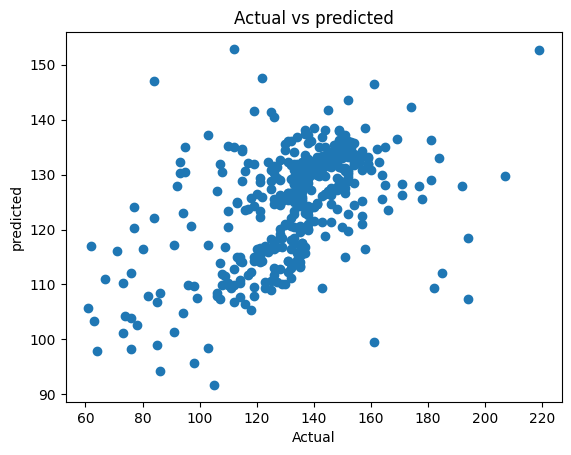

In [61]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, np.squeeze(model1.predict(X_test)) )
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title("Actual vs predicted")

In [62]:
y_prd=np.squeeze(np.squeeze(model1.predict(X_test)) )
predic_dif=pd.DataFrame({'Actual':Y_test,'predict':y_prd,"differences":Y_test-y_prd})
predic_dif[0:15]

14/14 [==============================] - 0s 2ms/step


,Actual,predict,differences
431,107,113.931953,-6.931953
610,125,118.290993,6.709007
795,132,122.101822,9.898178
1238,157,134.343033,22.656967
1228,153,135.645584,17.354416
794,116,123.509438,-7.509438
642,128,118.689545,9.310455
416,135,129.220932,5.779068
1410,115,134.208679,-19.208679
517,140,131.915283,8.084717


## NN with Dense layer

In [63]:
from keras.layers import Dense, Dropout,Activation
from keras.models import Sequential
import numpy as np
from keras.wrappers.scikit_learn import KerasRegressor
model2=Sequential()
model2.add(Dense(128, input_dim=4, activation='relu'))
model2.add(Dense(64,activation='relu'))
model2.add(Dense(1,activation='linear'))
model2.compile(loss='mean_squared_error',optimizer='adam', metrics=['mae'])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               640       
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 8,961
Trainable params: 8,961
Non-trainable params: 0
_________________________________________________________________


In [64]:
model2.fit(X_train,Y_train ,epochs =2000,batch_size=32,validation_split=0.3)

Epoch 1/2000
22/22 [==============================] - 3s 52ms/step - loss: 5343.8276 - mae: 56.5409 - val_loss: 2088.6570 - val_mae: 35.0984
Epoch 2/2000
22/22 [==============================] - 0s 16ms/step - loss: 974.6682 - mae: 23.8153 - val_loss: 734.1759 - val_mae: 19.5687
Epoch 3/2000
22/22 [==============================] - 0s 13ms/step - loss: 572.2755 - mae: 15.4541 - val_loss: 583.9985 - val_mae: 15.5233
Epoch 4/2000
22/22 [==============================] - 0s 17ms/step - loss: 458.5038 - mae: 13.5901 - val_loss: 490.5028 - val_mae: 14.1441
Epoch 5/2000
22/22 [==============================] - 0s 7ms/step - loss: 421.0051 - mae: 13.0710 - val_loss: 459.2491 - val_mae: 13.8510
Epoch 6/2000
22/22 [==============================] - 0s 16ms/step - loss: 409.5092 - mae: 12.9192 - val_loss: 447.9061 - val_mae: 13.6925
Epoch 7/2000
22/22 [==============================] - 0s 14ms/step - loss: 408.0118 - mae: 12.9137 - val_loss: 453.5908 - val_mae: 13.7126
Epoch 8/2000
22/22 [======

22/22 [==============================] - 0s 17ms/step - loss: 348.0884 - mae: 12.3820 - val_loss: 374.5192 - val_mae: 13.4546
Epoch 118/2000
22/22 [==============================] - 0s 20ms/step - loss: 342.7195 - mae: 12.2871 - val_loss: 370.4361 - val_mae: 13.3659
Epoch 119/2000
22/22 [==============================] - 1s 25ms/step - loss: 344.5711 - mae: 12.2881 - val_loss: 371.5330 - val_mae: 13.3962
Epoch 120/2000
22/22 [==============================] - 0s 21ms/step - loss: 344.7427 - mae: 12.2179 - val_loss: 369.4127 - val_mae: 13.3381
Epoch 121/2000
22/22 [==============================] - 1s 28ms/step - loss: 356.3480 - mae: 12.7707 - val_loss: 374.5297 - val_mae: 13.4651
Epoch 122/2000
22/22 [==============================] - 0s 10ms/step - loss: 347.3344 - mae: 12.3180 - val_loss: 373.1505 - val_mae: 13.4747
Epoch 123/2000
22/22 [==============================] - 0s 19ms/step - loss: 353.2737 - mae: 12.5434 - val_loss: 371.9139 - val_mae: 13.3778
Epoch 124/2000
22/22 [======

22/22 [==============================] - 0s 17ms/step - loss: 337.0928 - mae: 11.9991 - val_loss: 373.3962 - val_mae: 13.5136
Epoch 234/2000
22/22 [==============================] - 0s 16ms/step - loss: 340.0926 - mae: 12.3328 - val_loss: 368.2042 - val_mae: 13.2840
Epoch 235/2000
22/22 [==============================] - 0s 17ms/step - loss: 368.6160 - mae: 13.0671 - val_loss: 373.7504 - val_mae: 13.3308
Epoch 236/2000
22/22 [==============================] - 0s 11ms/step - loss: 341.9311 - mae: 12.3815 - val_loss: 379.9173 - val_mae: 13.5476
Epoch 237/2000
22/22 [==============================] - 0s 15ms/step - loss: 345.9412 - mae: 12.5724 - val_loss: 388.8575 - val_mae: 13.6831
Epoch 238/2000
22/22 [==============================] - 0s 19ms/step - loss: 341.1310 - mae: 12.3589 - val_loss: 368.3895 - val_mae: 13.3913
Epoch 239/2000
22/22 [==============================] - 0s 18ms/step - loss: 333.5262 - mae: 12.0838 - val_loss: 368.8143 - val_mae: 13.2902
Epoch 240/2000
22/22 [======

22/22 [==============================] - 0s 22ms/step - loss: 306.2547 - mae: 11.3833 - val_loss: 345.1421 - val_mae: 12.4039
Epoch 350/2000
22/22 [==============================] - 0s 15ms/step - loss: 308.9732 - mae: 11.4920 - val_loss: 406.7016 - val_mae: 14.3147
Epoch 351/2000
22/22 [==============================] - 0s 22ms/step - loss: 309.4291 - mae: 11.4815 - val_loss: 339.3307 - val_mae: 12.7349
Epoch 352/2000
22/22 [==============================] - 0s 14ms/step - loss: 309.2384 - mae: 11.6329 - val_loss: 336.6716 - val_mae: 12.3997
Epoch 353/2000
22/22 [==============================] - 0s 20ms/step - loss: 305.8921 - mae: 11.3968 - val_loss: 340.7471 - val_mae: 12.2982
Epoch 354/2000
22/22 [==============================] - 0s 10ms/step - loss: 302.2157 - mae: 11.3654 - val_loss: 372.8837 - val_mae: 13.0553
Epoch 355/2000
22/22 [==============================] - 0s 11ms/step - loss: 308.7288 - mae: 11.3886 - val_loss: 362.3429 - val_mae: 12.7862
Epoch 356/2000
22/22 [======

22/22 [==============================] - 0s 20ms/step - loss: 297.5028 - mae: 11.4897 - val_loss: 328.1564 - val_mae: 11.9113
Epoch 466/2000
22/22 [==============================] - 0s 12ms/step - loss: 281.9305 - mae: 11.2403 - val_loss: 325.6092 - val_mae: 11.8048
Epoch 467/2000
22/22 [==============================] - 0s 23ms/step - loss: 285.8235 - mae: 11.0197 - val_loss: 325.8918 - val_mae: 11.9233
Epoch 468/2000
22/22 [==============================] - 0s 20ms/step - loss: 280.5481 - mae: 10.9520 - val_loss: 327.1344 - val_mae: 11.9933
Epoch 469/2000
22/22 [==============================] - 0s 15ms/step - loss: 280.9551 - mae: 11.0670 - val_loss: 341.3198 - val_mae: 12.1794
Epoch 470/2000
22/22 [==============================] - 0s 16ms/step - loss: 281.0921 - mae: 11.0250 - val_loss: 321.3741 - val_mae: 11.8274
Epoch 471/2000
22/22 [==============================] - 0s 16ms/step - loss: 282.2040 - mae: 11.0366 - val_loss: 418.2885 - val_mae: 14.7250
Epoch 472/2000
22/22 [======

22/22 [==============================] - 0s 17ms/step - loss: 274.6040 - mae: 10.8472 - val_loss: 354.6361 - val_mae: 12.5739
Epoch 582/2000
22/22 [==============================] - 0s 13ms/step - loss: 272.1143 - mae: 11.0222 - val_loss: 303.1327 - val_mae: 11.7657
Epoch 583/2000
22/22 [==============================] - 0s 12ms/step - loss: 264.2727 - mae: 10.8851 - val_loss: 324.5685 - val_mae: 11.7495
Epoch 584/2000
22/22 [==============================] - 0s 14ms/step - loss: 269.5741 - mae: 10.7790 - val_loss: 365.8418 - val_mae: 12.7787
Epoch 585/2000
22/22 [==============================] - 0s 12ms/step - loss: 274.2135 - mae: 10.6274 - val_loss: 313.4396 - val_mae: 11.8084
Epoch 586/2000
22/22 [==============================] - 0s 17ms/step - loss: 264.4343 - mae: 10.6196 - val_loss: 318.3182 - val_mae: 11.7711
Epoch 587/2000
22/22 [==============================] - 0s 10ms/step - loss: 258.0334 - mae: 10.4856 - val_loss: 312.1530 - val_mae: 11.5979
Epoch 588/2000
22/22 [======

22/22 [==============================] - 0s 19ms/step - loss: 242.3937 - mae: 10.0464 - val_loss: 331.2787 - val_mae: 11.7381
Epoch 698/2000
22/22 [==============================] - 0s 15ms/step - loss: 262.7052 - mae: 10.8190 - val_loss: 308.0360 - val_mae: 11.3367
Epoch 699/2000
22/22 [==============================] - 0s 18ms/step - loss: 251.5944 - mae: 10.4943 - val_loss: 307.5794 - val_mae: 11.2644
Epoch 700/2000
22/22 [==============================] - 0s 12ms/step - loss: 264.5829 - mae: 10.8182 - val_loss: 328.1940 - val_mae: 11.4315
Epoch 701/2000
22/22 [==============================] - 0s 17ms/step - loss: 261.3551 - mae: 10.6592 - val_loss: 318.4730 - val_mae: 11.4282
Epoch 702/2000
22/22 [==============================] - 0s 15ms/step - loss: 247.5089 - mae: 10.2466 - val_loss: 321.2876 - val_mae: 11.4997
Epoch 703/2000
22/22 [==============================] - 0s 14ms/step - loss: 244.6045 - mae: 10.1736 - val_loss: 307.2716 - val_mae: 11.2343
Epoch 704/2000
22/22 [======

22/22 [==============================] - 0s 17ms/step - loss: 234.5260 - mae: 9.8302 - val_loss: 317.1507 - val_mae: 11.3664
Epoch 814/2000
22/22 [==============================] - 0s 19ms/step - loss: 229.3154 - mae: 9.8543 - val_loss: 290.7533 - val_mae: 11.7085
Epoch 815/2000
22/22 [==============================] - 0s 18ms/step - loss: 233.9980 - mae: 10.1730 - val_loss: 294.5632 - val_mae: 10.6414
Epoch 816/2000
22/22 [==============================] - 0s 20ms/step - loss: 228.2578 - mae: 9.7440 - val_loss: 349.7939 - val_mae: 12.2092
Epoch 817/2000
22/22 [==============================] - 0s 12ms/step - loss: 225.0977 - mae: 9.7036 - val_loss: 280.7376 - val_mae: 11.6034
Epoch 818/2000
22/22 [==============================] - 0s 21ms/step - loss: 234.1351 - mae: 9.7477 - val_loss: 282.5607 - val_mae: 10.7788
Epoch 819/2000
22/22 [==============================] - 0s 13ms/step - loss: 227.9875 - mae: 9.7217 - val_loss: 354.6830 - val_mae: 12.0042
Epoch 820/2000
22/22 [============

22/22 [==============================] - 0s 15ms/step - loss: 214.5219 - mae: 9.3003 - val_loss: 318.8250 - val_mae: 11.2241
Epoch 930/2000
22/22 [==============================] - 0s 18ms/step - loss: 220.4850 - mae: 9.4244 - val_loss: 280.2903 - val_mae: 11.6144
Epoch 931/2000
22/22 [==============================] - 0s 17ms/step - loss: 234.9180 - mae: 10.5721 - val_loss: 340.3788 - val_mae: 11.9866
Epoch 932/2000
22/22 [==============================] - 0s 14ms/step - loss: 225.1616 - mae: 9.7831 - val_loss: 278.2475 - val_mae: 10.2935
Epoch 933/2000
22/22 [==============================] - 0s 12ms/step - loss: 226.0599 - mae: 9.8710 - val_loss: 294.1814 - val_mae: 11.9809
Epoch 934/2000
22/22 [==============================] - 0s 17ms/step - loss: 215.4264 - mae: 9.3815 - val_loss: 328.0879 - val_mae: 11.2009
Epoch 935/2000
22/22 [==============================] - 0s 20ms/step - loss: 223.0205 - mae: 9.6888 - val_loss: 283.5906 - val_mae: 10.9527
Epoch 936/2000
22/22 [============

22/22 [==============================] - 0s 14ms/step - loss: 226.5657 - mae: 9.6177 - val_loss: 321.3311 - val_mae: 10.7470
Epoch 1046/2000
22/22 [==============================] - 0s 14ms/step - loss: 215.1697 - mae: 9.4349 - val_loss: 294.3780 - val_mae: 10.5505
Epoch 1047/2000
22/22 [==============================] - 0s 23ms/step - loss: 221.1765 - mae: 9.6659 - val_loss: 276.7894 - val_mae: 10.1238
Epoch 1048/2000
22/22 [==============================] - 0s 13ms/step - loss: 204.0574 - mae: 8.9296 - val_loss: 283.0537 - val_mae: 10.3586
Epoch 1049/2000
22/22 [==============================] - 0s 15ms/step - loss: 207.5091 - mae: 9.0265 - val_loss: 299.6677 - val_mae: 10.6024
Epoch 1050/2000
22/22 [==============================] - 0s 14ms/step - loss: 214.4106 - mae: 9.0594 - val_loss: 307.1799 - val_mae: 12.6543
Epoch 1051/2000
22/22 [==============================] - 0s 12ms/step - loss: 232.0394 - mae: 9.6603 - val_loss: 309.6065 - val_mae: 10.7277
Epoch 1052/2000
22/22 [======

22/22 [==============================] - 0s 7ms/step - loss: 197.8211 - mae: 8.9425 - val_loss: 321.1779 - val_mae: 11.2982
Epoch 1162/2000
22/22 [==============================] - 0s 17ms/step - loss: 205.4239 - mae: 9.1385 - val_loss: 287.1370 - val_mae: 11.1611
Epoch 1163/2000
22/22 [==============================] - 0s 15ms/step - loss: 202.3094 - mae: 9.1161 - val_loss: 336.6460 - val_mae: 11.6201
Epoch 1164/2000
22/22 [==============================] - 0s 11ms/step - loss: 208.5019 - mae: 9.5417 - val_loss: 299.7704 - val_mae: 10.5137
Epoch 1165/2000
22/22 [==============================] - 0s 18ms/step - loss: 199.0704 - mae: 8.8501 - val_loss: 279.2580 - val_mae: 10.2292
Epoch 1166/2000
22/22 [==============================] - 0s 18ms/step - loss: 200.8942 - mae: 8.8381 - val_loss: 289.7346 - val_mae: 10.2614
Epoch 1167/2000
22/22 [==============================] - 0s 24ms/step - loss: 197.4541 - mae: 8.7138 - val_loss: 312.1733 - val_mae: 10.8514
Epoch 1168/2000
22/22 [=======

22/22 [==============================] - 0s 15ms/step - loss: 197.5619 - mae: 8.8378 - val_loss: 275.5915 - val_mae: 10.2392
Epoch 1278/2000
22/22 [==============================] - 0s 10ms/step - loss: 205.2719 - mae: 9.1548 - val_loss: 313.7755 - val_mae: 10.8977
Epoch 1279/2000
22/22 [==============================] - 0s 23ms/step - loss: 214.3399 - mae: 9.3163 - val_loss: 284.6131 - val_mae: 10.6184
Epoch 1280/2000
22/22 [==============================] - 0s 11ms/step - loss: 198.8372 - mae: 9.0569 - val_loss: 287.9908 - val_mae: 10.5801
Epoch 1281/2000
22/22 [==============================] - 0s 13ms/step - loss: 198.3108 - mae: 9.1900 - val_loss: 289.4808 - val_mae: 10.2941
Epoch 1282/2000
22/22 [==============================] - 0s 16ms/step - loss: 190.1581 - mae: 8.7672 - val_loss: 280.1184 - val_mae: 10.0787
Epoch 1283/2000
22/22 [==============================] - 0s 14ms/step - loss: 196.0563 - mae: 8.8626 - val_loss: 295.3720 - val_mae: 10.6114
Epoch 1284/2000
22/22 [======

22/22 [==============================] - 0s 13ms/step - loss: 200.5202 - mae: 8.8370 - val_loss: 283.9824 - val_mae: 10.1739
Epoch 1394/2000
22/22 [==============================] - 0s 23ms/step - loss: 199.3522 - mae: 9.0965 - val_loss: 303.9361 - val_mae: 10.6045
Epoch 1395/2000
22/22 [==============================] - 0s 21ms/step - loss: 187.7791 - mae: 8.7285 - val_loss: 286.7702 - val_mae: 10.3560
Epoch 1396/2000
22/22 [==============================] - 0s 14ms/step - loss: 194.9301 - mae: 8.8792 - val_loss: 285.6205 - val_mae: 10.4284
Epoch 1397/2000
22/22 [==============================] - 0s 18ms/step - loss: 207.0346 - mae: 9.2501 - val_loss: 341.7437 - val_mae: 11.7551
Epoch 1398/2000
22/22 [==============================] - 0s 13ms/step - loss: 219.9205 - mae: 10.2943 - val_loss: 269.4704 - val_mae: 10.5765
Epoch 1399/2000
22/22 [==============================] - 0s 19ms/step - loss: 207.9641 - mae: 9.5005 - val_loss: 273.3598 - val_mae: 10.3450
Epoch 1400/2000
22/22 [=====

22/22 [==============================] - 0s 15ms/step - loss: 194.3649 - mae: 8.9532 - val_loss: 337.9104 - val_mae: 11.8287
Epoch 1510/2000
22/22 [==============================] - 0s 19ms/step - loss: 206.1997 - mae: 9.1742 - val_loss: 291.9476 - val_mae: 12.0765
Epoch 1511/2000
22/22 [==============================] - 0s 9ms/step - loss: 196.7422 - mae: 9.2519 - val_loss: 313.3210 - val_mae: 11.0280
Epoch 1512/2000
22/22 [==============================] - 0s 19ms/step - loss: 188.6471 - mae: 8.9074 - val_loss: 293.9599 - val_mae: 11.8453
Epoch 1513/2000
22/22 [==============================] - 0s 13ms/step - loss: 203.2306 - mae: 9.4576 - val_loss: 371.1544 - val_mae: 12.5797
Epoch 1514/2000
22/22 [==============================] - 0s 19ms/step - loss: 195.4315 - mae: 9.0628 - val_loss: 276.2009 - val_mae: 10.3521
Epoch 1515/2000
22/22 [==============================] - 0s 14ms/step - loss: 195.3405 - mae: 9.1531 - val_loss: 289.8503 - val_mae: 10.3649
Epoch 1516/2000
22/22 [=======

22/22 [==============================] - 0s 15ms/step - loss: 180.4370 - mae: 8.5684 - val_loss: 296.9914 - val_mae: 10.6438
Epoch 1626/2000
22/22 [==============================] - 0s 14ms/step - loss: 185.7532 - mae: 8.4799 - val_loss: 312.9578 - val_mae: 10.9182
Epoch 1627/2000
22/22 [==============================] - 0s 11ms/step - loss: 190.3585 - mae: 8.8078 - val_loss: 317.1454 - val_mae: 11.2299
Epoch 1628/2000
22/22 [==============================] - 0s 17ms/step - loss: 186.8381 - mae: 8.6332 - val_loss: 302.9136 - val_mae: 10.6561
Epoch 1629/2000
22/22 [==============================] - 0s 13ms/step - loss: 183.2999 - mae: 8.6376 - val_loss: 275.1426 - val_mae: 10.0655
Epoch 1630/2000
22/22 [==============================] - 0s 15ms/step - loss: 200.3020 - mae: 9.0332 - val_loss: 377.9791 - val_mae: 13.0465
Epoch 1631/2000
22/22 [==============================] - 0s 11ms/step - loss: 199.2321 - mae: 9.2348 - val_loss: 297.9177 - val_mae: 10.6681
Epoch 1632/2000
22/22 [======

22/22 [==============================] - 0s 19ms/step - loss: 204.1101 - mae: 9.8277 - val_loss: 292.7957 - val_mae: 10.4241
Epoch 1742/2000
22/22 [==============================] - 0s 14ms/step - loss: 186.1393 - mae: 8.8579 - val_loss: 313.8055 - val_mae: 10.5571
Epoch 1743/2000
22/22 [==============================] - 0s 19ms/step - loss: 187.1493 - mae: 8.9662 - val_loss: 277.4723 - val_mae: 10.3161
Epoch 1744/2000
22/22 [==============================] - 0s 13ms/step - loss: 179.5674 - mae: 8.6000 - val_loss: 276.6900 - val_mae: 10.2879
Epoch 1745/2000
22/22 [==============================] - 0s 20ms/step - loss: 180.0355 - mae: 8.4821 - val_loss: 310.1601 - val_mae: 10.8381
Epoch 1746/2000
22/22 [==============================] - 0s 12ms/step - loss: 182.2190 - mae: 8.4175 - val_loss: 282.5262 - val_mae: 10.5170
Epoch 1747/2000
22/22 [==============================] - 0s 18ms/step - loss: 183.6677 - mae: 8.6640 - val_loss: 295.3563 - val_mae: 10.5226
Epoch 1748/2000
22/22 [======

22/22 [==============================] - 0s 15ms/step - loss: 173.7270 - mae: 8.6135 - val_loss: 304.4990 - val_mae: 10.8810
Epoch 1858/2000
22/22 [==============================] - 0s 17ms/step - loss: 175.1288 - mae: 8.7355 - val_loss: 335.9436 - val_mae: 11.8545
Epoch 1859/2000
22/22 [==============================] - 0s 15ms/step - loss: 179.7973 - mae: 8.5376 - val_loss: 297.9108 - val_mae: 10.4276
Epoch 1860/2000
22/22 [==============================] - 0s 18ms/step - loss: 172.5555 - mae: 8.4197 - val_loss: 299.0013 - val_mae: 10.3630
Epoch 1861/2000
22/22 [==============================] - 0s 20ms/step - loss: 173.6599 - mae: 8.3776 - val_loss: 283.0929 - val_mae: 10.4267
Epoch 1862/2000
22/22 [==============================] - 0s 14ms/step - loss: 185.3057 - mae: 8.5382 - val_loss: 307.9711 - val_mae: 10.7229
Epoch 1863/2000
22/22 [==============================] - 0s 14ms/step - loss: 183.2405 - mae: 9.0517 - val_loss: 280.6721 - val_mae: 10.5138
Epoch 1864/2000
22/22 [======

22/22 [==============================] - 0s 10ms/step - loss: 168.0932 - mae: 8.0619 - val_loss: 296.6390 - val_mae: 10.4110
Epoch 1974/2000
22/22 [==============================] - 0s 15ms/step - loss: 169.7379 - mae: 8.1710 - val_loss: 303.9644 - val_mae: 10.5034
Epoch 1975/2000
22/22 [==============================] - 0s 12ms/step - loss: 170.5241 - mae: 8.3997 - val_loss: 312.0696 - val_mae: 11.0759
Epoch 1976/2000
22/22 [==============================] - 0s 19ms/step - loss: 172.0929 - mae: 8.5518 - val_loss: 295.7725 - val_mae: 10.5590
Epoch 1977/2000
22/22 [==============================] - 0s 13ms/step - loss: 167.6913 - mae: 8.1019 - val_loss: 314.5366 - val_mae: 10.5919
Epoch 1978/2000
22/22 [==============================] - 0s 13ms/step - loss: 188.7278 - mae: 8.7372 - val_loss: 287.2052 - val_mae: 10.1770
Epoch 1979/2000
22/22 [==============================] - 0s 14ms/step - loss: 181.2352 - mae: 8.5681 - val_loss: 316.9480 - val_mae: 10.3792
Epoch 1980/2000
22/22 [======

In [65]:
from sklearn.metrics import r2_score
r2_score(Y_test, np.squeeze(model2.predict(X_test)) )

14/14 [==============================] - 1s 2ms/step


0.1941426602413212

In [66]:
prediction =np.squeeze(model2.predict([[80,2,2,129]]))
print("Prediction: {}".format(prediction))

1/1 [==============================] - 1s 878ms/step
Prediction: 88.01700592041016


In [67]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse= mean_squared_error(Y_test, np.squeeze(model2.predict(X_test)) )
mae= mean_absolute_error(Y_test, np.squeeze(model2.predict(X_test)) )
print('mean squired error:', mse)
print('mean absolute error:', mae)

14/14 [==============================] - 0s 2ms/step
mean squired error: 413.63105358526536
mean absolute error: 12.238158499131181


14/14 [==============================] - 0s 2ms/step


Text(0.5, 1.0, 'Actual vs predicted')

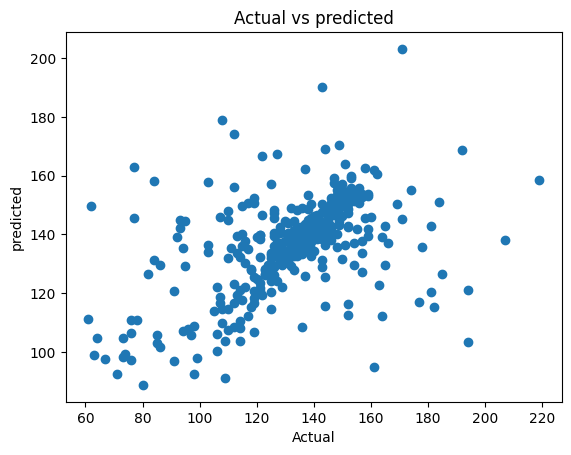

In [68]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, np.squeeze(model2.predict(X_test)) )
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title("Actual vs predicted")

In [69]:
y_prd=np.squeeze(np.squeeze(model2.predict(X_test)) )
predic_dif=pd.DataFrame({'Actual':Y_test,'predict':y_prd,"differences":Y_test-y_prd})
predic_dif[0:15]

14/14 [==============================] - 0s 2ms/step


,Actual,predict,differences
431,107,116.560997,-9.560997
610,125,131.850815,-6.850815
795,132,132.908371,-0.908371
1238,157,152.809082,4.190918
1228,153,155.667633,-2.667633
794,116,130.279175,-14.279175
642,128,134.743881,-6.743881
416,135,134.357239,0.642761
1410,115,140.204620,-25.204620
517,140,139.121246,0.878754


## RNN

In [70]:
from keras.layers import Dense, Dropout,Activation, LSTM
from keras.models import Sequential
model3=Sequential()
model3.add(LSTM(units=128, activation='relu', return_sequences=True, input_shape=(X_train.shape[1],1)))
model3.add(Dropout(0.2))
model3.add(LSTM(units=64, activation='relu', return_sequences=True))
model3.add(Dropout(0.3))
model3.add(LSTM(units=32, activation='relu', return_sequences=True))
model3.add(Dropout(0.4))
model3.add(LSTM(units=64, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(units=1))
model3.compile(loss='mean_squared_error',optimizer='adam', metrics=['mae'])
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4, 128)            66560     
                                                                 
 dropout_1 (Dropout)         (None, 4, 128)            0         
                                                                 
 lstm_1 (LSTM)               (None, 4, 64)             49408     
                                                                 
 dropout_2 (Dropout)         (None, 4, 64)             0         
                                                                 
 lstm_2 (LSTM)               (None, 4, 32)             12416     
                                                                 
 dropout_3 (Dropout)         (None, 4, 32)             0         
                                                                 
 lstm_3 (LSTM)               (None, 64)               

In [71]:
model3.fit(X_train,Y_train ,epochs =2000,batch_size=32,validation_split=0.3)

Epoch 1/2000
22/22 [==============================] - 62s 383ms/step - loss: 16643.6230 - mae: 126.1216 - val_loss: 3033.5344 - val_mae: 44.3466
Epoch 2/2000
22/22 [==============================] - 1s 36ms/step - loss: 4809.9995 - mae: 56.6469 - val_loss: 3228.6770 - val_mae: 45.9854
Epoch 3/2000
22/22 [==============================] - 1s 34ms/step - loss: 2550.7283 - mae: 41.2660 - val_loss: 640.2823 - val_mae: 20.8868
Epoch 4/2000
22/22 [==============================] - 1s 32ms/step - loss: 2238.0198 - mae: 38.8377 - val_loss: 409.9260 - val_mae: 13.9419
Epoch 5/2000
22/22 [==============================] - 1s 33ms/step - loss: 1837.5781 - mae: 34.2023 - val_loss: 584.0358 - val_mae: 18.1188
Epoch 6/2000
22/22 [==============================] - 1s 34ms/step - loss: 1787.3154 - mae: 34.3973 - val_loss: 706.9400 - val_mae: 22.9023
Epoch 7/2000
22/22 [==============================] - 1s 37ms/step - loss: 1675.3984 - mae: 31.9921 - val_loss: 1448.5145 - val_mae: 34.6134
Epoch 8/2000


22/22 [==============================] - 1s 35ms/step - loss: 863.7626 - mae: 23.1632 - val_loss: 576.2630 - val_mae: 20.3748
Epoch 118/2000
22/22 [==============================] - 1s 30ms/step - loss: 819.4319 - mae: 22.2583 - val_loss: 406.1640 - val_mae: 15.7439
Epoch 119/2000
22/22 [==============================] - 1s 39ms/step - loss: 844.2314 - mae: 22.6514 - val_loss: 434.5036 - val_mae: 16.5975
Epoch 120/2000
22/22 [==============================] - 1s 32ms/step - loss: 805.4864 - mae: 22.2243 - val_loss: 377.2560 - val_mae: 14.7746
Epoch 121/2000
22/22 [==============================] - 1s 40ms/step - loss: 790.6077 - mae: 21.9011 - val_loss: 358.4124 - val_mae: 13.1780
Epoch 122/2000
22/22 [==============================] - 1s 36ms/step - loss: 872.6409 - mae: 23.6029 - val_loss: 433.8678 - val_mae: 16.5971
Epoch 123/2000
22/22 [==============================] - 1s 34ms/step - loss: 848.3608 - mae: 22.7656 - val_loss: 361.0818 - val_mae: 13.5058
Epoch 124/2000
22/22 [======

22/22 [==============================] - 1s 32ms/step - loss: 750.0073 - mae: 21.3365 - val_loss: 350.6068 - val_mae: 12.8368
Epoch 234/2000
22/22 [==============================] - 1s 38ms/step - loss: 723.3024 - mae: 21.0212 - val_loss: 356.4272 - val_mae: 12.9021
Epoch 235/2000
22/22 [==============================] - 1s 35ms/step - loss: 801.5373 - mae: 22.1701 - val_loss: 365.8422 - val_mae: 13.0631
Epoch 236/2000
22/22 [==============================] - 1s 37ms/step - loss: 811.0629 - mae: 21.8566 - val_loss: 389.4365 - val_mae: 14.0771
Epoch 237/2000
22/22 [==============================] - 1s 32ms/step - loss: 811.8790 - mae: 22.2068 - val_loss: 338.2561 - val_mae: 13.1559
Epoch 238/2000
22/22 [==============================] - 1s 37ms/step - loss: 741.2314 - mae: 21.4920 - val_loss: 339.7603 - val_mae: 13.3380
Epoch 239/2000
22/22 [==============================] - 1s 32ms/step - loss: 796.5115 - mae: 21.9809 - val_loss: 394.2775 - val_mae: 15.2393
Epoch 240/2000
22/22 [======

22/22 [==============================] - 1s 45ms/step - loss: 709.6292 - mae: 20.9448 - val_loss: 320.6436 - val_mae: 12.9345
Epoch 350/2000
22/22 [==============================] - 1s 41ms/step - loss: 762.1505 - mae: 21.4108 - val_loss: 377.2962 - val_mae: 15.0711
Epoch 351/2000
22/22 [==============================] - 1s 45ms/step - loss: 671.8525 - mae: 20.3252 - val_loss: 309.7520 - val_mae: 11.7653
Epoch 352/2000
22/22 [==============================] - 1s 44ms/step - loss: 697.7645 - mae: 20.5570 - val_loss: 303.3602 - val_mae: 11.4446
Epoch 353/2000
22/22 [==============================] - 1s 46ms/step - loss: 720.1205 - mae: 20.9281 - val_loss: 327.2133 - val_mae: 11.7604
Epoch 354/2000
22/22 [==============================] - 1s 47ms/step - loss: 742.1179 - mae: 21.5312 - val_loss: 325.5819 - val_mae: 12.0302
Epoch 355/2000
22/22 [==============================] - 1s 40ms/step - loss: 771.2629 - mae: 21.6821 - val_loss: 324.5013 - val_mae: 11.7927
Epoch 356/2000
22/22 [======

22/22 [==============================] - 1s 33ms/step - loss: 715.5120 - mae: 20.8525 - val_loss: 325.4883 - val_mae: 12.0066
Epoch 466/2000
22/22 [==============================] - 1s 41ms/step - loss: 669.9254 - mae: 20.3006 - val_loss: 333.6666 - val_mae: 13.1739
Epoch 467/2000
22/22 [==============================] - 1s 37ms/step - loss: 734.6085 - mae: 21.1810 - val_loss: 354.8102 - val_mae: 13.4850
Epoch 468/2000
22/22 [==============================] - 1s 40ms/step - loss: 715.2111 - mae: 21.2033 - val_loss: 323.6078 - val_mae: 12.1018
Epoch 469/2000
22/22 [==============================] - 1s 42ms/step - loss: 683.4024 - mae: 20.2669 - val_loss: 310.1343 - val_mae: 11.3070
Epoch 470/2000
22/22 [==============================] - 1s 42ms/step - loss: 683.3817 - mae: 20.1460 - val_loss: 326.6253 - val_mae: 11.3810
Epoch 471/2000
22/22 [==============================] - 1s 37ms/step - loss: 740.1448 - mae: 21.4879 - val_loss: 310.8152 - val_mae: 11.9046
Epoch 472/2000
22/22 [======

22/22 [==============================] - 1s 41ms/step - loss: 673.3176 - mae: 20.0895 - val_loss: 332.5202 - val_mae: 11.7402
Epoch 582/2000
22/22 [==============================] - 1s 39ms/step - loss: 640.8174 - mae: 19.6161 - val_loss: 327.4431 - val_mae: 11.1541
Epoch 583/2000
22/22 [==============================] - 1s 38ms/step - loss: 626.2222 - mae: 19.5971 - val_loss: 386.9069 - val_mae: 15.5523
Epoch 584/2000
22/22 [==============================] - 1s 35ms/step - loss: 746.5370 - mae: 21.2919 - val_loss: 368.2185 - val_mae: 14.3634
Epoch 585/2000
22/22 [==============================] - 1s 33ms/step - loss: 690.1533 - mae: 20.6911 - val_loss: 338.6614 - val_mae: 12.7082
Epoch 586/2000
22/22 [==============================] - 1s 37ms/step - loss: 659.3295 - mae: 20.0355 - val_loss: 332.6329 - val_mae: 12.2697
Epoch 587/2000
22/22 [==============================] - 1s 37ms/step - loss: 662.4297 - mae: 20.0408 - val_loss: 323.4023 - val_mae: 12.5164
Epoch 588/2000
22/22 [======

22/22 [==============================] - 1s 56ms/step - loss: 663.0279 - mae: 20.3029 - val_loss: 334.4728 - val_mae: 12.0034
Epoch 698/2000
22/22 [==============================] - 1s 51ms/step - loss: 585.6559 - mae: 18.7923 - val_loss: 302.2286 - val_mae: 11.2903
Epoch 699/2000
22/22 [==============================] - 1s 31ms/step - loss: 674.7059 - mae: 20.2526 - val_loss: 310.3102 - val_mae: 11.1179
Epoch 700/2000
22/22 [==============================] - 1s 49ms/step - loss: 672.5073 - mae: 20.3761 - val_loss: 304.0456 - val_mae: 10.8240
Epoch 701/2000
22/22 [==============================] - 1s 40ms/step - loss: 680.7472 - mae: 20.5272 - val_loss: 326.8422 - val_mae: 11.1595
Epoch 702/2000
22/22 [==============================] - 1s 39ms/step - loss: 708.0293 - mae: 20.7953 - val_loss: 307.1902 - val_mae: 11.0331
Epoch 703/2000
22/22 [==============================] - 1s 40ms/step - loss: 656.9618 - mae: 19.9068 - val_loss: 294.2245 - val_mae: 10.8509
Epoch 704/2000
22/22 [======

22/22 [==============================] - 1s 38ms/step - loss: 631.1119 - mae: 19.7182 - val_loss: 322.1833 - val_mae: 12.4480
Epoch 814/2000
22/22 [==============================] - 1s 35ms/step - loss: 666.0015 - mae: 20.1163 - val_loss: 334.2428 - val_mae: 10.9902
Epoch 815/2000
22/22 [==============================] - 1s 33ms/step - loss: 581.6891 - mae: 19.1504 - val_loss: 322.8383 - val_mae: 11.8101
Epoch 816/2000
22/22 [==============================] - 1s 36ms/step - loss: 744.4019 - mae: 21.1688 - val_loss: 353.9615 - val_mae: 12.7422
Epoch 817/2000
22/22 [==============================] - 1s 36ms/step - loss: 671.0754 - mae: 20.4867 - val_loss: 324.1905 - val_mae: 12.3395
Epoch 818/2000
22/22 [==============================] - 1s 37ms/step - loss: 634.7343 - mae: 19.3983 - val_loss: 334.0241 - val_mae: 12.3121
Epoch 819/2000
22/22 [==============================] - 1s 32ms/step - loss: 616.5247 - mae: 19.5191 - val_loss: 311.2518 - val_mae: 11.8620
Epoch 820/2000
22/22 [======

22/22 [==============================] - 1s 38ms/step - loss: 584.3881 - mae: 18.9145 - val_loss: 313.8254 - val_mae: 10.9206
Epoch 930/2000
22/22 [==============================] - 1s 36ms/step - loss: 597.7125 - mae: 19.1451 - val_loss: 338.3918 - val_mae: 13.0771
Epoch 931/2000
22/22 [==============================] - 1s 47ms/step - loss: 614.5828 - mae: 19.5422 - val_loss: 332.9817 - val_mae: 12.1334
Epoch 932/2000
22/22 [==============================] - 1s 42ms/step - loss: 544.9869 - mae: 18.2654 - val_loss: 326.9341 - val_mae: 10.7661
Epoch 933/2000
22/22 [==============================] - 1s 38ms/step - loss: 552.9037 - mae: 18.0648 - val_loss: 340.2628 - val_mae: 11.4342
Epoch 934/2000
22/22 [==============================] - 1s 38ms/step - loss: 526.7618 - mae: 17.7946 - val_loss: 317.7759 - val_mae: 10.9817
Epoch 935/2000
22/22 [==============================] - 1s 42ms/step - loss: 585.7277 - mae: 18.6146 - val_loss: 337.7318 - val_mae: 12.4115
Epoch 936/2000
22/22 [======

Epoch 1045/2000
22/22 [==============================] - 1s 46ms/step - loss: 497.1024 - mae: 17.3798 - val_loss: 312.3557 - val_mae: 11.1215
Epoch 1046/2000
22/22 [==============================] - 1s 40ms/step - loss: 530.0394 - mae: 17.9125 - val_loss: 304.3751 - val_mae: 10.4278
Epoch 1047/2000
22/22 [==============================] - 1s 36ms/step - loss: 544.2158 - mae: 18.1855 - val_loss: 318.2314 - val_mae: 10.6066
Epoch 1048/2000
22/22 [==============================] - 1s 38ms/step - loss: 545.4829 - mae: 18.0054 - val_loss: 313.9140 - val_mae: 10.7376
Epoch 1049/2000
22/22 [==============================] - 1s 37ms/step - loss: 554.7468 - mae: 18.0582 - val_loss: 348.7408 - val_mae: 11.5352
Epoch 1050/2000
22/22 [==============================] - 1s 38ms/step - loss: 543.1868 - mae: 18.5106 - val_loss: 335.7691 - val_mae: 11.9350
Epoch 1051/2000
22/22 [==============================] - 1s 35ms/step - loss: 501.4931 - mae: 17.3538 - val_loss: 314.5319 - val_mae: 11.2609
Epoch 

Epoch 1103/2000
22/22 [==============================] - 1s 38ms/step - loss: 559.7448 - mae: 18.2412 - val_loss: 301.6667 - val_mae: 10.9158
Epoch 1104/2000
22/22 [==============================] - 1s 33ms/step - loss: 524.1310 - mae: 17.6297 - val_loss: 326.5859 - val_mae: 11.5116
Epoch 1105/2000
22/22 [==============================] - 1s 34ms/step - loss: 516.2151 - mae: 17.5114 - val_loss: 334.0001 - val_mae: 12.1176
Epoch 1106/2000
22/22 [==============================] - 1s 39ms/step - loss: 523.7446 - mae: 17.9686 - val_loss: 314.0504 - val_mae: 11.0466
Epoch 1107/2000
22/22 [==============================] - 1s 32ms/step - loss: 517.4103 - mae: 17.4377 - val_loss: 327.5695 - val_mae: 11.1074
Epoch 1108/2000
22/22 [==============================] - 1s 38ms/step - loss: 539.7637 - mae: 18.1234 - val_loss: 301.1148 - val_mae: 10.3372
Epoch 1109/2000
22/22 [==============================] - 1s 38ms/step - loss: 539.9626 - mae: 18.2808 - val_loss: 308.1166 - val_mae: 11.2314
Epoch 

Epoch 1161/2000
22/22 [==============================] - 1s 44ms/step - loss: 529.9507 - mae: 17.8957 - val_loss: 327.0373 - val_mae: 10.5548
Epoch 1162/2000
22/22 [==============================] - 1s 42ms/step - loss: 457.0732 - mae: 16.7211 - val_loss: 304.7000 - val_mae: 10.7911
Epoch 1163/2000
22/22 [==============================] - 1s 32ms/step - loss: 543.6222 - mae: 18.3325 - val_loss: 326.1645 - val_mae: 11.0197
Epoch 1164/2000
22/22 [==============================] - 1s 46ms/step - loss: 492.7608 - mae: 17.4348 - val_loss: 318.9573 - val_mae: 11.8580
Epoch 1165/2000
22/22 [==============================] - 1s 48ms/step - loss: 510.4312 - mae: 17.6104 - val_loss: 296.8418 - val_mae: 10.1601
Epoch 1166/2000
22/22 [==============================] - 1s 40ms/step - loss: 514.3505 - mae: 17.3983 - val_loss: 313.4691 - val_mae: 11.6728
Epoch 1167/2000
22/22 [==============================] - 1s 44ms/step - loss: 562.0297 - mae: 18.0472 - val_loss: 298.4326 - val_mae: 10.2229
Epoch 

Epoch 1219/2000
22/22 [==============================] - 1s 39ms/step - loss: 472.4833 - mae: 16.8633 - val_loss: 328.1890 - val_mae: 12.5795
Epoch 1220/2000
22/22 [==============================] - 1s 40ms/step - loss: 520.9996 - mae: 17.7524 - val_loss: 310.2815 - val_mae: 11.2208
Epoch 1221/2000
22/22 [==============================] - 1s 38ms/step - loss: 519.6252 - mae: 17.9034 - val_loss: 321.6512 - val_mae: 11.0445
Epoch 1222/2000
22/22 [==============================] - 1s 41ms/step - loss: 499.8201 - mae: 17.0567 - val_loss: 374.7922 - val_mae: 11.4311
Epoch 1223/2000
22/22 [==============================] - 1s 43ms/step - loss: 499.5442 - mae: 17.7551 - val_loss: 331.7741 - val_mae: 12.5747
Epoch 1224/2000
22/22 [==============================] - 1s 45ms/step - loss: 501.3241 - mae: 17.4613 - val_loss: 310.4122 - val_mae: 11.2609
Epoch 1225/2000
22/22 [==============================] - 1s 46ms/step - loss: 545.2705 - mae: 18.2514 - val_loss: 323.8904 - val_mae: 11.2361
Epoch 

Epoch 1277/2000
22/22 [==============================] - 1s 35ms/step - loss: 564.4282 - mae: 18.2279 - val_loss: 328.3541 - val_mae: 10.4255
Epoch 1278/2000
22/22 [==============================] - 1s 33ms/step - loss: 530.7847 - mae: 17.9142 - val_loss: 332.0992 - val_mae: 11.9256
Epoch 1279/2000
22/22 [==============================] - 1s 41ms/step - loss: 569.8744 - mae: 18.6471 - val_loss: 310.1307 - val_mae: 11.2731
Epoch 1280/2000
22/22 [==============================] - 1s 43ms/step - loss: 511.2435 - mae: 17.4342 - val_loss: 327.4049 - val_mae: 10.8391
Epoch 1281/2000
22/22 [==============================] - 1s 43ms/step - loss: 545.4064 - mae: 18.1307 - val_loss: 333.1880 - val_mae: 11.1600
Epoch 1282/2000
22/22 [==============================] - 1s 41ms/step - loss: 427.7332 - mae: 16.3836 - val_loss: 337.7611 - val_mae: 12.0385
Epoch 1283/2000
22/22 [==============================] - 1s 34ms/step - loss: 477.1806 - mae: 16.9082 - val_loss: 307.5162 - val_mae: 11.2762
Epoch 

Epoch 1335/2000
22/22 [==============================] - 1s 38ms/step - loss: 488.2753 - mae: 16.8641 - val_loss: 303.4728 - val_mae: 10.4157
Epoch 1336/2000
22/22 [==============================] - 1s 36ms/step - loss: 534.3864 - mae: 18.1079 - val_loss: 317.1143 - val_mae: 10.5362
Epoch 1337/2000
22/22 [==============================] - 1s 32ms/step - loss: 492.1671 - mae: 17.5895 - val_loss: 327.2135 - val_mae: 11.5554
Epoch 1338/2000
22/22 [==============================] - 1s 38ms/step - loss: 456.2719 - mae: 16.8299 - val_loss: 338.8883 - val_mae: 11.4896
Epoch 1339/2000
22/22 [==============================] - 1s 33ms/step - loss: 485.2599 - mae: 17.0647 - val_loss: 346.3058 - val_mae: 12.1567
Epoch 1340/2000
22/22 [==============================] - 1s 35ms/step - loss: 477.5388 - mae: 16.9818 - val_loss: 323.7584 - val_mae: 11.3863
Epoch 1341/2000
22/22 [==============================] - 1s 42ms/step - loss: 509.4388 - mae: 17.3375 - val_loss: 328.9892 - val_mae: 12.1793
Epoch 

Epoch 1393/2000
22/22 [==============================] - 1s 37ms/step - loss: 484.9160 - mae: 17.1229 - val_loss: 341.3192 - val_mae: 12.2907
Epoch 1394/2000
22/22 [==============================] - 1s 35ms/step - loss: 446.1407 - mae: 16.6652 - val_loss: 328.1674 - val_mae: 10.8590
Epoch 1395/2000
22/22 [==============================] - 1s 35ms/step - loss: 481.1974 - mae: 16.5461 - val_loss: 330.9229 - val_mae: 11.4263
Epoch 1396/2000
22/22 [==============================] - 1s 35ms/step - loss: 450.8573 - mae: 16.8505 - val_loss: 332.5683 - val_mae: 11.0679
Epoch 1397/2000
22/22 [==============================] - 1s 34ms/step - loss: 506.1460 - mae: 17.6358 - val_loss: 366.6136 - val_mae: 11.8910
Epoch 1398/2000
22/22 [==============================] - 1s 35ms/step - loss: 467.0763 - mae: 16.6378 - val_loss: 349.6902 - val_mae: 11.1386
Epoch 1399/2000
22/22 [==============================] - 1s 36ms/step - loss: 461.4572 - mae: 16.4626 - val_loss: 310.9753 - val_mae: 10.9654
Epoch 

Epoch 1451/2000
22/22 [==============================] - 1s 42ms/step - loss: 525.3939 - mae: 17.7375 - val_loss: 348.8619 - val_mae: 11.7683
Epoch 1452/2000
22/22 [==============================] - 1s 39ms/step - loss: 440.2465 - mae: 16.6119 - val_loss: 354.4278 - val_mae: 12.8433
Epoch 1453/2000
22/22 [==============================] - 1s 34ms/step - loss: 482.3791 - mae: 17.4328 - val_loss: 339.5124 - val_mae: 12.1499
Epoch 1454/2000
22/22 [==============================] - 1s 36ms/step - loss: 480.8462 - mae: 17.1652 - val_loss: 307.9225 - val_mae: 10.8604
Epoch 1455/2000
22/22 [==============================] - 1s 36ms/step - loss: 465.7999 - mae: 16.7187 - val_loss: 326.1001 - val_mae: 11.0819
Epoch 1456/2000
22/22 [==============================] - 1s 36ms/step - loss: 480.7369 - mae: 16.8586 - val_loss: 349.4166 - val_mae: 12.0754
Epoch 1457/2000
22/22 [==============================] - 1s 34ms/step - loss: 504.4300 - mae: 17.4433 - val_loss: 340.1981 - val_mae: 11.5291
Epoch 

Epoch 1509/2000
22/22 [==============================] - 1s 27ms/step - loss: 448.5780 - mae: 16.4501 - val_loss: 334.8049 - val_mae: 10.7979
Epoch 1510/2000
22/22 [==============================] - 1s 26ms/step - loss: 485.9882 - mae: 17.5125 - val_loss: 330.0255 - val_mae: 10.8107
Epoch 1511/2000
22/22 [==============================] - 1s 30ms/step - loss: 492.9872 - mae: 16.9639 - val_loss: 309.7802 - val_mae: 10.4994
Epoch 1512/2000
22/22 [==============================] - 1s 28ms/step - loss: 475.5089 - mae: 16.8281 - val_loss: 300.7435 - val_mae: 10.7858
Epoch 1513/2000
22/22 [==============================] - 1s 24ms/step - loss: 448.6609 - mae: 16.8114 - val_loss: 315.6072 - val_mae: 12.0119
Epoch 1514/2000
22/22 [==============================] - 1s 25ms/step - loss: 411.3631 - mae: 16.0383 - val_loss: 326.0174 - val_mae: 11.5983
Epoch 1515/2000
22/22 [==============================] - 1s 26ms/step - loss: 437.6306 - mae: 16.5933 - val_loss: 309.4824 - val_mae: 10.8727
Epoch 

Epoch 1567/2000
22/22 [==============================] - 1s 29ms/step - loss: 444.7042 - mae: 16.6985 - val_loss: 340.0776 - val_mae: 11.4994
Epoch 1568/2000
22/22 [==============================] - 1s 31ms/step - loss: 455.6469 - mae: 16.7305 - val_loss: 327.9674 - val_mae: 10.9832
Epoch 1569/2000
22/22 [==============================] - 1s 27ms/step - loss: 441.0898 - mae: 16.6524 - val_loss: 330.1490 - val_mae: 11.0453
Epoch 1570/2000
22/22 [==============================] - 1s 27ms/step - loss: 418.1311 - mae: 16.0885 - val_loss: 348.7772 - val_mae: 11.3855
Epoch 1571/2000
22/22 [==============================] - 1s 28ms/step - loss: 434.4575 - mae: 16.2338 - val_loss: 355.7448 - val_mae: 11.2551
Epoch 1572/2000
22/22 [==============================] - 1s 32ms/step - loss: 411.5049 - mae: 15.9736 - val_loss: 337.2496 - val_mae: 10.7940
Epoch 1573/2000
22/22 [==============================] - 1s 26ms/step - loss: 394.8006 - mae: 15.5910 - val_loss: 337.3592 - val_mae: 11.2174
Epoch 

Epoch 1625/2000
22/22 [==============================] - 1s 30ms/step - loss: 438.8645 - mae: 16.2417 - val_loss: 325.6725 - val_mae: 10.8535
Epoch 1626/2000
22/22 [==============================] - 1s 30ms/step - loss: 446.1461 - mae: 16.5296 - val_loss: 338.2141 - val_mae: 11.6783
Epoch 1627/2000
22/22 [==============================] - 1s 29ms/step - loss: 425.3838 - mae: 15.9728 - val_loss: 348.7888 - val_mae: 11.0351
Epoch 1628/2000
22/22 [==============================] - 1s 30ms/step - loss: 421.8907 - mae: 15.9025 - val_loss: 338.7921 - val_mae: 11.9799
Epoch 1629/2000
22/22 [==============================] - 1s 27ms/step - loss: 446.3272 - mae: 16.7836 - val_loss: 335.1535 - val_mae: 10.9916
Epoch 1630/2000
22/22 [==============================] - 1s 29ms/step - loss: 482.5290 - mae: 16.9719 - val_loss: 391.5977 - val_mae: 11.9484
Epoch 1631/2000
22/22 [==============================] - 1s 27ms/step - loss: 464.0768 - mae: 16.9728 - val_loss: 331.9021 - val_mae: 11.7413
Epoch 

Epoch 1683/2000
22/22 [==============================] - 1s 26ms/step - loss: 428.3471 - mae: 16.3860 - val_loss: 321.9289 - val_mae: 10.6681
Epoch 1684/2000
22/22 [==============================] - 1s 27ms/step - loss: 426.8741 - mae: 16.3022 - val_loss: 338.0103 - val_mae: 10.8150
Epoch 1685/2000
22/22 [==============================] - 1s 27ms/step - loss: 437.8831 - mae: 16.1219 - val_loss: 330.1181 - val_mae: 11.4721
Epoch 1686/2000
22/22 [==============================] - 1s 27ms/step - loss: 423.3347 - mae: 15.9795 - val_loss: 343.9406 - val_mae: 11.5113
Epoch 1687/2000
22/22 [==============================] - 1s 33ms/step - loss: 419.1432 - mae: 16.1376 - val_loss: 324.2436 - val_mae: 10.9500
Epoch 1688/2000
22/22 [==============================] - 1s 33ms/step - loss: 424.2296 - mae: 15.6547 - val_loss: 320.8958 - val_mae: 10.9919
Epoch 1689/2000
22/22 [==============================] - 1s 29ms/step - loss: 485.0085 - mae: 17.0498 - val_loss: 340.7661 - val_mae: 10.7397
Epoch 

Epoch 1741/2000
22/22 [==============================] - 1s 25ms/step - loss: 453.1169 - mae: 16.7965 - val_loss: 367.3184 - val_mae: 11.0303
Epoch 1742/2000
22/22 [==============================] - 1s 27ms/step - loss: 437.7917 - mae: 16.4377 - val_loss: 346.3396 - val_mae: 11.3207
Epoch 1743/2000
22/22 [==============================] - 1s 26ms/step - loss: 393.1092 - mae: 15.5128 - val_loss: 353.6790 - val_mae: 11.9361
Epoch 1744/2000
22/22 [==============================] - 1s 28ms/step - loss: 428.1974 - mae: 15.9704 - val_loss: 340.9410 - val_mae: 11.3195
Epoch 1745/2000
22/22 [==============================] - 1s 29ms/step - loss: 428.7959 - mae: 15.9206 - val_loss: 353.6843 - val_mae: 12.8575
Epoch 1746/2000
22/22 [==============================] - 1s 26ms/step - loss: 454.2173 - mae: 16.8351 - val_loss: 367.4717 - val_mae: 11.7083
Epoch 1747/2000
22/22 [==============================] - 1s 26ms/step - loss: 441.2130 - mae: 16.5656 - val_loss: 365.4440 - val_mae: 11.5076
Epoch 

Epoch 1799/2000
22/22 [==============================] - 1s 35ms/step - loss: 450.7674 - mae: 16.5473 - val_loss: 325.6960 - val_mae: 11.1910
Epoch 1800/2000
22/22 [==============================] - 1s 45ms/step - loss: 422.5756 - mae: 15.7141 - val_loss: 302.9873 - val_mae: 10.7319
Epoch 1801/2000
22/22 [==============================] - 1s 42ms/step - loss: 455.4132 - mae: 16.6932 - val_loss: 344.3655 - val_mae: 11.5551
Epoch 1802/2000
22/22 [==============================] - 1s 34ms/step - loss: 422.9791 - mae: 16.0695 - val_loss: 331.2446 - val_mae: 10.7583
Epoch 1803/2000
22/22 [==============================] - 1s 37ms/step - loss: 421.1193 - mae: 15.8666 - val_loss: 335.3524 - val_mae: 10.9466
Epoch 1804/2000
22/22 [==============================] - 1s 43ms/step - loss: 439.8320 - mae: 16.3319 - val_loss: 401.4426 - val_mae: 11.7743
Epoch 1805/2000
22/22 [==============================] - 1s 39ms/step - loss: 435.7389 - mae: 15.8941 - val_loss: 338.5918 - val_mae: 10.6113
Epoch 

Epoch 1857/2000
22/22 [==============================] - 1s 35ms/step - loss: 438.2958 - mae: 16.4983 - val_loss: 332.9042 - val_mae: 11.1695
Epoch 1858/2000
22/22 [==============================] - 1s 41ms/step - loss: 401.2076 - mae: 15.6403 - val_loss: 345.4356 - val_mae: 11.1777
Epoch 1859/2000
22/22 [==============================] - 1s 40ms/step - loss: 420.1812 - mae: 15.9962 - val_loss: 341.1104 - val_mae: 11.5478
Epoch 1860/2000
22/22 [==============================] - 1s 32ms/step - loss: 455.8252 - mae: 16.4985 - val_loss: 363.3737 - val_mae: 12.3909
Epoch 1861/2000
22/22 [==============================] - 1s 37ms/step - loss: 436.3265 - mae: 16.2828 - val_loss: 314.9500 - val_mae: 10.3632
Epoch 1862/2000
22/22 [==============================] - 1s 32ms/step - loss: 431.0602 - mae: 16.0468 - val_loss: 356.8053 - val_mae: 12.5184
Epoch 1863/2000
22/22 [==============================] - 1s 37ms/step - loss: 451.3850 - mae: 16.4762 - val_loss: 338.6245 - val_mae: 11.0354
Epoch 

Epoch 1915/2000
22/22 [==============================] - 1s 38ms/step - loss: 490.0036 - mae: 17.1710 - val_loss: 341.2058 - val_mae: 12.0275
Epoch 1916/2000
22/22 [==============================] - 1s 32ms/step - loss: 458.3471 - mae: 16.6984 - val_loss: 336.5393 - val_mae: 10.8013
Epoch 1917/2000
22/22 [==============================] - 1s 36ms/step - loss: 428.6721 - mae: 16.0718 - val_loss: 351.8682 - val_mae: 10.8914
Epoch 1918/2000
22/22 [==============================] - 1s 40ms/step - loss: 432.4542 - mae: 16.2215 - val_loss: 336.1381 - val_mae: 10.8905
Epoch 1919/2000
22/22 [==============================] - 1s 36ms/step - loss: 422.4914 - mae: 15.5292 - val_loss: 367.9618 - val_mae: 12.2999
Epoch 1920/2000
22/22 [==============================] - 1s 42ms/step - loss: 440.5079 - mae: 16.2077 - val_loss: 341.0529 - val_mae: 10.8266
Epoch 1921/2000
22/22 [==============================] - 1s 29ms/step - loss: 441.0030 - mae: 16.2878 - val_loss: 331.2800 - val_mae: 10.9516
Epoch 

Epoch 1973/2000
22/22 [==============================] - 1s 33ms/step - loss: 418.3021 - mae: 15.9551 - val_loss: 342.7028 - val_mae: 12.0289
Epoch 1974/2000
22/22 [==============================] - 1s 33ms/step - loss: 397.2832 - mae: 15.3278 - val_loss: 315.0804 - val_mae: 10.4878
Epoch 1975/2000
22/22 [==============================] - 1s 48ms/step - loss: 414.5557 - mae: 15.4711 - val_loss: 317.0795 - val_mae: 10.3558
Epoch 1976/2000
22/22 [==============================] - 1s 45ms/step - loss: 411.3189 - mae: 15.8280 - val_loss: 367.0739 - val_mae: 11.7859
Epoch 1977/2000
22/22 [==============================] - 1s 38ms/step - loss: 469.1157 - mae: 16.5157 - val_loss: 376.0648 - val_mae: 13.8682
Epoch 1978/2000
22/22 [==============================] - 1s 34ms/step - loss: 482.2683 - mae: 16.8552 - val_loss: 322.2273 - val_mae: 11.5085
Epoch 1979/2000
22/22 [==============================] - 1s 34ms/step - loss: 421.5220 - mae: 15.9370 - val_loss: 342.3824 - val_mae: 10.9596
Epoch 

In [72]:
from sklearn.metrics import r2_score
r2_score(Y_test, np.squeeze(model3.predict(X_test)) )

14/14 [==============================] - 5s 6ms/step


0.10367841823360091

In [73]:
prediction =np.squeeze(model3.predict([[80,2,2,129]]))
print("Prediction: {}".format(prediction))

1/1 [==============================] - 5s 5s/step
Prediction: 92.26494598388672


In [74]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse= mean_squared_error(Y_test, np.squeeze(model3.predict(X_test)) )
mae= mean_absolute_error(Y_test, np.squeeze(model3.predict(X_test)) )
print('mean squired error:', mse)
print('mean absolute error:', mae)

14/14 [==============================] - 0s 11ms/step
mean squired error: 460.06460687976187
mean absolute error: 14.247357937091953


14/14 [==============================] - 0s 8ms/step


Text(0.5, 1.0, 'Actual vs predicted')

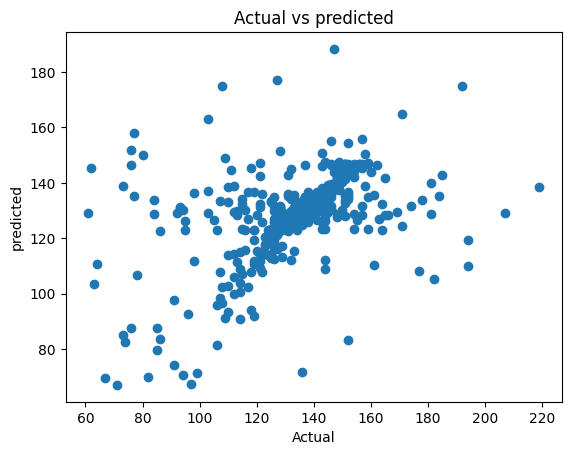

In [75]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, np.squeeze(model3.predict(X_test)) )
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title("Actual vs predicted")

In [76]:
y_prd=np.squeeze(np.squeeze(model3.predict(X_test)) )
predic_dif=pd.DataFrame({'Actual':Y_test,'predict':y_prd,"differences":Y_test-y_prd})
predic_dif[0:15]

14/14 [==============================] - 0s 12ms/step


,Actual,predict,differences
431,107,107.947327,-0.947327
610,125,121.340668,3.659332
795,132,128.357346,3.642654
1238,157,145.832733,11.167267
1228,153,144.849609,8.150391
794,116,123.052048,-7.052048
642,128,123.805641,4.194359
416,135,129.278915,5.721085
1410,115,123.442902,-8.442902
517,140,133.693924,6.306076


##  keras tuner with dense

In [7]:
from tensorflow import keras
from keras import layers
from keras.layers import Dense
from kerastuner.tuners import RandomSearch
def build_model(hp):
    model2= keras.Sequential()
    for i in range(hp.Int('num_layers',2,20)):
        model2.add(layers.Dense(units=hp.Int('units_' + str(i),
                                           min_value=32,
                                           max_value=512,
                                           step=32),
                              activation='relu'))
        model2.add(layers.Dense(1, activation='linear',name='Dense_1'))
        model2.compile(
              optimizer=keras.optimizers.Adam(
                 hp.Choice('learning rate', [1e-1,1e-2,1e-3,1e-4,1e-5])),
              loss='mean_absolute_error',
              metrics=['mean_absolute_error'])
        return model2

C:\Users\rafi\AppData\Local\Temp\ipykernel_11252\1490801469.py:4: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [8]:
tuner=RandomSearch(build_model,objective='val_mean_absolute_error',max_trials=50, executions_per_trial=3,directory='project1',project_name='A1')

INFO:tensorflow:Reloading Oracle from existing project project1\A1\oracle.json
INFO:tensorflow:Reloading Tuner from project1\A1\tuner0.json


In [9]:
tuner.search(X_train,Y_train ,epochs=100,validation_data=(X_test,Y_test))

INFO:tensorflow:Oracle triggered exit


In [10]:
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

In [11]:
model4 = tuner.hypermodel.build(best_hps)
model4.fit(X_train, Y_train, epochs=2000,batch_size=32, validation_split=0.3)

Epoch 1/2000
22/22 [==============================] - 1s 20ms/step - loss: 94.1384 - mean_absolute_error: 94.1384 - val_loss: 15.0710 - val_mean_absolute_error: 15.0710
Epoch 2/2000
22/22 [==============================] - 0s 6ms/step - loss: 16.0034 - mean_absolute_error: 16.0034 - val_loss: 16.6639 - val_mean_absolute_error: 16.6639
Epoch 3/2000
22/22 [==============================] - 0s 5ms/step - loss: 18.7988 - mean_absolute_error: 18.7988 - val_loss: 14.7594 - val_mean_absolute_error: 14.7594
Epoch 4/2000
22/22 [==============================] - 0s 5ms/step - loss: 14.7801 - mean_absolute_error: 14.7801 - val_loss: 16.2457 - val_mean_absolute_error: 16.2457
Epoch 5/2000
22/22 [==============================] - 0s 5ms/step - loss: 13.5465 - mean_absolute_error: 13.5465 - val_loss: 14.9728 - val_mean_absolute_error: 14.9728
Epoch 6/2000
22/22 [==============================] - 0s 5ms/step - loss: 13.4648 - mean_absolute_error: 13.4648 - val_loss: 14.3656 - val_mean_absolute_error:

22/22 [==============================] - 0s 5ms/step - loss: 13.2083 - mean_absolute_error: 13.2083 - val_loss: 15.1319 - val_mean_absolute_error: 15.1319
Epoch 98/2000
22/22 [==============================] - 0s 5ms/step - loss: 14.1737 - mean_absolute_error: 14.1737 - val_loss: 14.7771 - val_mean_absolute_error: 14.7771
Epoch 99/2000
22/22 [==============================] - 0s 5ms/step - loss: 13.6869 - mean_absolute_error: 13.6869 - val_loss: 13.3515 - val_mean_absolute_error: 13.3515
Epoch 100/2000
22/22 [==============================] - 0s 5ms/step - loss: 12.6459 - mean_absolute_error: 12.6459 - val_loss: 13.2122 - val_mean_absolute_error: 13.2122
Epoch 101/2000
22/22 [==============================] - 0s 4ms/step - loss: 12.9284 - mean_absolute_error: 12.9284 - val_loss: 13.4571 - val_mean_absolute_error: 13.4571
Epoch 102/2000
22/22 [==============================] - 0s 5ms/step - loss: 12.8361 - mean_absolute_error: 12.8361 - val_loss: 13.8080 - val_mean_absolute_error: 13.80

22/22 [==============================] - 0s 4ms/step - loss: 14.2615 - mean_absolute_error: 14.2615 - val_loss: 13.8782 - val_mean_absolute_error: 13.8782
Epoch 194/2000
22/22 [==============================] - 0s 5ms/step - loss: 13.4732 - mean_absolute_error: 13.4732 - val_loss: 13.7637 - val_mean_absolute_error: 13.7637
Epoch 195/2000
22/22 [==============================] - 0s 5ms/step - loss: 13.5478 - mean_absolute_error: 13.5478 - val_loss: 17.2493 - val_mean_absolute_error: 17.2493
Epoch 196/2000
22/22 [==============================] - 0s 5ms/step - loss: 13.6289 - mean_absolute_error: 13.6289 - val_loss: 20.7300 - val_mean_absolute_error: 20.7300
Epoch 197/2000
22/22 [==============================] - 0s 5ms/step - loss: 14.4221 - mean_absolute_error: 14.4221 - val_loss: 13.6111 - val_mean_absolute_error: 13.6111
Epoch 198/2000
22/22 [==============================] - 0s 5ms/step - loss: 14.8240 - mean_absolute_error: 14.8240 - val_loss: 13.5789 - val_mean_absolute_error: 13.

22/22 [==============================] - 0s 5ms/step - loss: 13.9695 - mean_absolute_error: 13.9695 - val_loss: 16.1254 - val_mean_absolute_error: 16.1254
Epoch 290/2000
22/22 [==============================] - 0s 5ms/step - loss: 15.0463 - mean_absolute_error: 15.0463 - val_loss: 13.4963 - val_mean_absolute_error: 13.4963
Epoch 291/2000
22/22 [==============================] - 0s 4ms/step - loss: 12.9978 - mean_absolute_error: 12.9978 - val_loss: 14.2927 - val_mean_absolute_error: 14.2927
Epoch 292/2000
22/22 [==============================] - 0s 5ms/step - loss: 13.3604 - mean_absolute_error: 13.3604 - val_loss: 15.0095 - val_mean_absolute_error: 15.0095
Epoch 293/2000
22/22 [==============================] - 0s 5ms/step - loss: 12.8872 - mean_absolute_error: 12.8872 - val_loss: 13.6276 - val_mean_absolute_error: 13.6276
Epoch 294/2000
22/22 [==============================] - 0s 4ms/step - loss: 12.8613 - mean_absolute_error: 12.8613 - val_loss: 15.4449 - val_mean_absolute_error: 15.

22/22 [==============================] - 0s 6ms/step - loss: 12.6404 - mean_absolute_error: 12.6404 - val_loss: 13.6683 - val_mean_absolute_error: 13.6683
Epoch 386/2000
22/22 [==============================] - 0s 7ms/step - loss: 12.9847 - mean_absolute_error: 12.9847 - val_loss: 13.3606 - val_mean_absolute_error: 13.3606
Epoch 387/2000
22/22 [==============================] - 0s 7ms/step - loss: 13.2232 - mean_absolute_error: 13.2232 - val_loss: 13.7498 - val_mean_absolute_error: 13.7498
Epoch 388/2000
22/22 [==============================] - 0s 8ms/step - loss: 12.4595 - mean_absolute_error: 12.4595 - val_loss: 15.2570 - val_mean_absolute_error: 15.2570
Epoch 389/2000
22/22 [==============================] - 0s 5ms/step - loss: 13.0229 - mean_absolute_error: 13.0229 - val_loss: 13.7356 - val_mean_absolute_error: 13.7356
Epoch 390/2000
22/22 [==============================] - 0s 7ms/step - loss: 12.6136 - mean_absolute_error: 12.6136 - val_loss: 13.5204 - val_mean_absolute_error: 13.

22/22 [==============================] - 0s 4ms/step - loss: 12.4765 - mean_absolute_error: 12.4765 - val_loss: 13.3169 - val_mean_absolute_error: 13.3169
Epoch 482/2000
22/22 [==============================] - 0s 3ms/step - loss: 12.9086 - mean_absolute_error: 12.9086 - val_loss: 13.3149 - val_mean_absolute_error: 13.3149
Epoch 483/2000
22/22 [==============================] - 0s 4ms/step - loss: 13.1386 - mean_absolute_error: 13.1386 - val_loss: 15.2024 - val_mean_absolute_error: 15.2024
Epoch 484/2000
22/22 [==============================] - 0s 4ms/step - loss: 12.8763 - mean_absolute_error: 12.8763 - val_loss: 13.3346 - val_mean_absolute_error: 13.3346
Epoch 485/2000
22/22 [==============================] - 0s 4ms/step - loss: 13.4200 - mean_absolute_error: 13.4200 - val_loss: 14.5208 - val_mean_absolute_error: 14.5208
Epoch 486/2000
22/22 [==============================] - 0s 4ms/step - loss: 12.6146 - mean_absolute_error: 12.6146 - val_loss: 13.7452 - val_mean_absolute_error: 13.

22/22 [==============================] - 0s 3ms/step - loss: 13.1626 - mean_absolute_error: 13.1626 - val_loss: 13.2342 - val_mean_absolute_error: 13.2342
Epoch 578/2000
22/22 [==============================] - 0s 3ms/step - loss: 13.5109 - mean_absolute_error: 13.5109 - val_loss: 14.8763 - val_mean_absolute_error: 14.8763
Epoch 579/2000
22/22 [==============================] - 0s 4ms/step - loss: 14.8326 - mean_absolute_error: 14.8326 - val_loss: 15.2837 - val_mean_absolute_error: 15.2837
Epoch 580/2000
22/22 [==============================] - 0s 4ms/step - loss: 13.1795 - mean_absolute_error: 13.1795 - val_loss: 13.4562 - val_mean_absolute_error: 13.4562
Epoch 581/2000
22/22 [==============================] - 0s 4ms/step - loss: 13.3021 - mean_absolute_error: 13.3021 - val_loss: 16.3203 - val_mean_absolute_error: 16.3203
Epoch 582/2000
22/22 [==============================] - 0s 4ms/step - loss: 12.7888 - mean_absolute_error: 12.7888 - val_loss: 15.9420 - val_mean_absolute_error: 15.

22/22 [==============================] - 0s 4ms/step - loss: 12.5509 - mean_absolute_error: 12.5509 - val_loss: 13.4381 - val_mean_absolute_error: 13.4381
Epoch 674/2000
22/22 [==============================] - 0s 4ms/step - loss: 13.2449 - mean_absolute_error: 13.2449 - val_loss: 13.5686 - val_mean_absolute_error: 13.5686
Epoch 675/2000
22/22 [==============================] - 0s 4ms/step - loss: 12.9411 - mean_absolute_error: 12.9411 - val_loss: 14.3207 - val_mean_absolute_error: 14.3207
Epoch 676/2000
22/22 [==============================] - 0s 4ms/step - loss: 12.9256 - mean_absolute_error: 12.9256 - val_loss: 13.2030 - val_mean_absolute_error: 13.2030
Epoch 677/2000
22/22 [==============================] - 0s 4ms/step - loss: 12.7078 - mean_absolute_error: 12.7078 - val_loss: 13.5530 - val_mean_absolute_error: 13.5530
Epoch 678/2000
22/22 [==============================] - 0s 5ms/step - loss: 12.6892 - mean_absolute_error: 12.6892 - val_loss: 13.2417 - val_mean_absolute_error: 13.

22/22 [==============================] - 0s 4ms/step - loss: 12.3994 - mean_absolute_error: 12.3994 - val_loss: 13.1786 - val_mean_absolute_error: 13.1786
Epoch 770/2000
22/22 [==============================] - 0s 4ms/step - loss: 12.9335 - mean_absolute_error: 12.9335 - val_loss: 13.3478 - val_mean_absolute_error: 13.3478
Epoch 771/2000
22/22 [==============================] - 0s 4ms/step - loss: 14.2567 - mean_absolute_error: 14.2567 - val_loss: 16.1056 - val_mean_absolute_error: 16.1056
Epoch 772/2000
22/22 [==============================] - 0s 4ms/step - loss: 13.0038 - mean_absolute_error: 13.0038 - val_loss: 13.1698 - val_mean_absolute_error: 13.1698
Epoch 773/2000
22/22 [==============================] - 0s 4ms/step - loss: 12.7587 - mean_absolute_error: 12.7587 - val_loss: 14.1898 - val_mean_absolute_error: 14.1898
Epoch 774/2000
22/22 [==============================] - 0s 4ms/step - loss: 13.3304 - mean_absolute_error: 13.3304 - val_loss: 16.3122 - val_mean_absolute_error: 16.

22/22 [==============================] - 0s 5ms/step - loss: 12.6375 - mean_absolute_error: 12.6375 - val_loss: 13.7196 - val_mean_absolute_error: 13.7196
Epoch 866/2000
22/22 [==============================] - 0s 4ms/step - loss: 13.4891 - mean_absolute_error: 13.4891 - val_loss: 13.1488 - val_mean_absolute_error: 13.1488
Epoch 867/2000
22/22 [==============================] - 0s 5ms/step - loss: 12.7617 - mean_absolute_error: 12.7617 - val_loss: 13.2865 - val_mean_absolute_error: 13.2865
Epoch 868/2000
22/22 [==============================] - 0s 5ms/step - loss: 13.3226 - mean_absolute_error: 13.3226 - val_loss: 13.1899 - val_mean_absolute_error: 13.1899
Epoch 869/2000
22/22 [==============================] - 0s 5ms/step - loss: 12.8783 - mean_absolute_error: 12.8783 - val_loss: 13.1301 - val_mean_absolute_error: 13.1301
Epoch 870/2000
22/22 [==============================] - 0s 4ms/step - loss: 12.9010 - mean_absolute_error: 12.9010 - val_loss: 13.6172 - val_mean_absolute_error: 13.

22/22 [==============================] - 0s 5ms/step - loss: 12.8407 - mean_absolute_error: 12.8407 - val_loss: 13.0820 - val_mean_absolute_error: 13.0820
Epoch 962/2000
22/22 [==============================] - 0s 5ms/step - loss: 12.4884 - mean_absolute_error: 12.4884 - val_loss: 13.0801 - val_mean_absolute_error: 13.0801
Epoch 963/2000
22/22 [==============================] - 0s 5ms/step - loss: 12.4356 - mean_absolute_error: 12.4356 - val_loss: 13.3001 - val_mean_absolute_error: 13.3001
Epoch 964/2000
22/22 [==============================] - 0s 4ms/step - loss: 12.8324 - mean_absolute_error: 12.8324 - val_loss: 15.8931 - val_mean_absolute_error: 15.8931
Epoch 965/2000
22/22 [==============================] - 0s 4ms/step - loss: 13.0446 - mean_absolute_error: 13.0446 - val_loss: 13.0533 - val_mean_absolute_error: 13.0533
Epoch 966/2000
22/22 [==============================] - 0s 4ms/step - loss: 12.6908 - mean_absolute_error: 12.6908 - val_loss: 13.1241 - val_mean_absolute_error: 13.

22/22 [==============================] - 0s 5ms/step - loss: 13.0222 - mean_absolute_error: 13.0222 - val_loss: 13.1230 - val_mean_absolute_error: 13.1230
Epoch 1058/2000
22/22 [==============================] - 0s 5ms/step - loss: 12.6218 - mean_absolute_error: 12.6218 - val_loss: 14.5509 - val_mean_absolute_error: 14.5509
Epoch 1059/2000
22/22 [==============================] - 0s 5ms/step - loss: 12.5890 - mean_absolute_error: 12.5890 - val_loss: 13.2673 - val_mean_absolute_error: 13.2673
Epoch 1060/2000
22/22 [==============================] - 0s 5ms/step - loss: 13.2993 - mean_absolute_error: 13.2993 - val_loss: 14.0345 - val_mean_absolute_error: 14.0345
Epoch 1061/2000
22/22 [==============================] - 0s 5ms/step - loss: 13.2664 - mean_absolute_error: 13.2664 - val_loss: 13.7746 - val_mean_absolute_error: 13.7746
Epoch 1062/2000
22/22 [==============================] - 0s 6ms/step - loss: 12.7807 - mean_absolute_error: 12.7807 - val_loss: 13.0964 - val_mean_absolute_error

22/22 [==============================] - 0s 5ms/step - loss: 12.8731 - mean_absolute_error: 12.8731 - val_loss: 13.6312 - val_mean_absolute_error: 13.6312
Epoch 1106/2000
22/22 [==============================] - 0s 6ms/step - loss: 12.5598 - mean_absolute_error: 12.5598 - val_loss: 13.1281 - val_mean_absolute_error: 13.1281
Epoch 1107/2000
22/22 [==============================] - 0s 5ms/step - loss: 12.4112 - mean_absolute_error: 12.4112 - val_loss: 13.9484 - val_mean_absolute_error: 13.9484
Epoch 1108/2000
22/22 [==============================] - 0s 5ms/step - loss: 13.0085 - mean_absolute_error: 13.0085 - val_loss: 14.6016 - val_mean_absolute_error: 14.6016
Epoch 1109/2000
22/22 [==============================] - 0s 5ms/step - loss: 13.0740 - mean_absolute_error: 13.0740 - val_loss: 13.0623 - val_mean_absolute_error: 13.0623
Epoch 1110/2000
22/22 [==============================] - 0s 5ms/step - loss: 13.3828 - mean_absolute_error: 13.3828 - val_loss: 13.1044 - val_mean_absolute_error

22/22 [==============================] - 0s 5ms/step - loss: 12.3868 - mean_absolute_error: 12.3868 - val_loss: 13.9661 - val_mean_absolute_error: 13.9661
Epoch 1154/2000
22/22 [==============================] - 0s 5ms/step - loss: 13.1532 - mean_absolute_error: 13.1532 - val_loss: 13.1190 - val_mean_absolute_error: 13.1190
Epoch 1155/2000
22/22 [==============================] - 0s 6ms/step - loss: 13.3902 - mean_absolute_error: 13.3902 - val_loss: 13.0790 - val_mean_absolute_error: 13.0790
Epoch 1156/2000
22/22 [==============================] - 0s 5ms/step - loss: 15.1425 - mean_absolute_error: 15.1425 - val_loss: 13.8225 - val_mean_absolute_error: 13.8225
Epoch 1157/2000
22/22 [==============================] - 0s 5ms/step - loss: 12.9914 - mean_absolute_error: 12.9914 - val_loss: 13.3442 - val_mean_absolute_error: 13.3442
Epoch 1158/2000
22/22 [==============================] - 0s 6ms/step - loss: 12.6808 - mean_absolute_error: 12.6808 - val_loss: 13.6624 - val_mean_absolute_error

22/22 [==============================] - 0s 5ms/step - loss: 13.1987 - mean_absolute_error: 13.1987 - val_loss: 13.6764 - val_mean_absolute_error: 13.6764
Epoch 1202/2000
22/22 [==============================] - 0s 5ms/step - loss: 13.0327 - mean_absolute_error: 13.0327 - val_loss: 13.0902 - val_mean_absolute_error: 13.0902
Epoch 1203/2000
22/22 [==============================] - 0s 6ms/step - loss: 12.7832 - mean_absolute_error: 12.7832 - val_loss: 13.1312 - val_mean_absolute_error: 13.1312
Epoch 1204/2000
22/22 [==============================] - 0s 5ms/step - loss: 13.0003 - mean_absolute_error: 13.0003 - val_loss: 13.2897 - val_mean_absolute_error: 13.2897
Epoch 1205/2000
22/22 [==============================] - 0s 4ms/step - loss: 13.1016 - mean_absolute_error: 13.1016 - val_loss: 13.8507 - val_mean_absolute_error: 13.8507
Epoch 1206/2000
22/22 [==============================] - 0s 5ms/step - loss: 12.7676 - mean_absolute_error: 12.7676 - val_loss: 13.4787 - val_mean_absolute_error

22/22 [==============================] - 0s 5ms/step - loss: 13.5070 - mean_absolute_error: 13.5070 - val_loss: 13.0402 - val_mean_absolute_error: 13.0402
Epoch 1250/2000
22/22 [==============================] - 0s 5ms/step - loss: 12.7879 - mean_absolute_error: 12.7879 - val_loss: 13.8154 - val_mean_absolute_error: 13.8154
Epoch 1251/2000
22/22 [==============================] - 0s 5ms/step - loss: 12.6980 - mean_absolute_error: 12.6980 - val_loss: 13.3095 - val_mean_absolute_error: 13.3095
Epoch 1252/2000
22/22 [==============================] - 0s 5ms/step - loss: 13.8256 - mean_absolute_error: 13.8256 - val_loss: 15.2313 - val_mean_absolute_error: 15.2313
Epoch 1253/2000
22/22 [==============================] - 0s 5ms/step - loss: 13.1855 - mean_absolute_error: 13.1855 - val_loss: 14.6350 - val_mean_absolute_error: 14.6350
Epoch 1254/2000
22/22 [==============================] - 0s 5ms/step - loss: 13.0734 - mean_absolute_error: 13.0734 - val_loss: 14.0807 - val_mean_absolute_error

22/22 [==============================] - 0s 5ms/step - loss: 12.9174 - mean_absolute_error: 12.9174 - val_loss: 13.4448 - val_mean_absolute_error: 13.4448
Epoch 1298/2000
22/22 [==============================] - 0s 4ms/step - loss: 13.6514 - mean_absolute_error: 13.6514 - val_loss: 13.0809 - val_mean_absolute_error: 13.0809
Epoch 1299/2000
22/22 [==============================] - 0s 5ms/step - loss: 12.4680 - mean_absolute_error: 12.4680 - val_loss: 13.0303 - val_mean_absolute_error: 13.0303
Epoch 1300/2000
22/22 [==============================] - 0s 4ms/step - loss: 12.4712 - mean_absolute_error: 12.4712 - val_loss: 13.1749 - val_mean_absolute_error: 13.1749
Epoch 1301/2000
22/22 [==============================] - 0s 5ms/step - loss: 12.6621 - mean_absolute_error: 12.6621 - val_loss: 14.1979 - val_mean_absolute_error: 14.1979
Epoch 1302/2000
22/22 [==============================] - 0s 5ms/step - loss: 12.9847 - mean_absolute_error: 12.9847 - val_loss: 13.7391 - val_mean_absolute_error

22/22 [==============================] - 0s 5ms/step - loss: 12.6792 - mean_absolute_error: 12.6792 - val_loss: 13.0836 - val_mean_absolute_error: 13.0836
Epoch 1346/2000
22/22 [==============================] - 0s 5ms/step - loss: 12.5737 - mean_absolute_error: 12.5737 - val_loss: 13.8738 - val_mean_absolute_error: 13.8738
Epoch 1347/2000
22/22 [==============================] - 0s 5ms/step - loss: 13.5087 - mean_absolute_error: 13.5087 - val_loss: 13.2040 - val_mean_absolute_error: 13.2040
Epoch 1348/2000
22/22 [==============================] - 0s 5ms/step - loss: 13.3513 - mean_absolute_error: 13.3513 - val_loss: 13.2809 - val_mean_absolute_error: 13.2809
Epoch 1349/2000
22/22 [==============================] - 0s 5ms/step - loss: 13.7025 - mean_absolute_error: 13.7025 - val_loss: 13.3174 - val_mean_absolute_error: 13.3174
Epoch 1350/2000
22/22 [==============================] - 0s 5ms/step - loss: 12.9613 - mean_absolute_error: 12.9613 - val_loss: 16.1234 - val_mean_absolute_error

22/22 [==============================] - 0s 5ms/step - loss: 12.8266 - mean_absolute_error: 12.8266 - val_loss: 14.6435 - val_mean_absolute_error: 14.6435
Epoch 1394/2000
22/22 [==============================] - 0s 5ms/step - loss: 14.0816 - mean_absolute_error: 14.0816 - val_loss: 15.6555 - val_mean_absolute_error: 15.6555
Epoch 1395/2000
22/22 [==============================] - 0s 5ms/step - loss: 13.4745 - mean_absolute_error: 13.4745 - val_loss: 16.4037 - val_mean_absolute_error: 16.4037
Epoch 1396/2000
22/22 [==============================] - 0s 4ms/step - loss: 13.0970 - mean_absolute_error: 13.0970 - val_loss: 15.4530 - val_mean_absolute_error: 15.4530
Epoch 1397/2000
22/22 [==============================] - 0s 5ms/step - loss: 13.9232 - mean_absolute_error: 13.9232 - val_loss: 14.8769 - val_mean_absolute_error: 14.8769
Epoch 1398/2000
22/22 [==============================] - 0s 5ms/step - loss: 12.8311 - mean_absolute_error: 12.8311 - val_loss: 13.1543 - val_mean_absolute_error

22/22 [==============================] - 0s 5ms/step - loss: 12.7027 - mean_absolute_error: 12.7027 - val_loss: 13.0695 - val_mean_absolute_error: 13.0695
Epoch 1442/2000
22/22 [==============================] - 0s 5ms/step - loss: 14.2630 - mean_absolute_error: 14.2630 - val_loss: 13.0857 - val_mean_absolute_error: 13.0857
Epoch 1443/2000
22/22 [==============================] - 0s 5ms/step - loss: 12.7576 - mean_absolute_error: 12.7576 - val_loss: 13.6853 - val_mean_absolute_error: 13.6853
Epoch 1444/2000
22/22 [==============================] - 0s 5ms/step - loss: 13.9953 - mean_absolute_error: 13.9953 - val_loss: 13.7436 - val_mean_absolute_error: 13.7436
Epoch 1445/2000
22/22 [==============================] - 0s 8ms/step - loss: 13.4554 - mean_absolute_error: 13.4554 - val_loss: 13.1299 - val_mean_absolute_error: 13.1299
Epoch 1446/2000
22/22 [==============================] - 0s 5ms/step - loss: 13.4705 - mean_absolute_error: 13.4705 - val_loss: 18.6999 - val_mean_absolute_error

22/22 [==============================] - 0s 5ms/step - loss: 13.5216 - mean_absolute_error: 13.5216 - val_loss: 15.5487 - val_mean_absolute_error: 15.5487
Epoch 1490/2000
22/22 [==============================] - 0s 5ms/step - loss: 13.0019 - mean_absolute_error: 13.0019 - val_loss: 15.0491 - val_mean_absolute_error: 15.0491
Epoch 1491/2000
22/22 [==============================] - 0s 5ms/step - loss: 12.9300 - mean_absolute_error: 12.9300 - val_loss: 14.2339 - val_mean_absolute_error: 14.2339
Epoch 1492/2000
22/22 [==============================] - 0s 5ms/step - loss: 12.7472 - mean_absolute_error: 12.7472 - val_loss: 13.0557 - val_mean_absolute_error: 13.0557
Epoch 1493/2000
22/22 [==============================] - 0s 5ms/step - loss: 12.9328 - mean_absolute_error: 12.9328 - val_loss: 13.0353 - val_mean_absolute_error: 13.0353
Epoch 1494/2000
22/22 [==============================] - 0s 5ms/step - loss: 12.6102 - mean_absolute_error: 12.6102 - val_loss: 13.5976 - val_mean_absolute_error

22/22 [==============================] - 0s 5ms/step - loss: 13.1931 - mean_absolute_error: 13.1931 - val_loss: 14.6810 - val_mean_absolute_error: 14.6810
Epoch 1538/2000
22/22 [==============================] - 0s 5ms/step - loss: 13.2133 - mean_absolute_error: 13.2133 - val_loss: 13.3181 - val_mean_absolute_error: 13.3181
Epoch 1539/2000
22/22 [==============================] - 0s 5ms/step - loss: 12.9570 - mean_absolute_error: 12.9570 - val_loss: 13.2286 - val_mean_absolute_error: 13.2286
Epoch 1540/2000
22/22 [==============================] - 0s 5ms/step - loss: 12.8266 - mean_absolute_error: 12.8266 - val_loss: 13.0930 - val_mean_absolute_error: 13.0930
Epoch 1541/2000
22/22 [==============================] - 0s 5ms/step - loss: 12.7120 - mean_absolute_error: 12.7120 - val_loss: 13.2859 - val_mean_absolute_error: 13.2859
Epoch 1542/2000
22/22 [==============================] - 0s 6ms/step - loss: 13.2961 - mean_absolute_error: 13.2961 - val_loss: 14.8711 - val_mean_absolute_error

22/22 [==============================] - 0s 6ms/step - loss: 12.8988 - mean_absolute_error: 12.8988 - val_loss: 14.6489 - val_mean_absolute_error: 14.6489
Epoch 1586/2000
22/22 [==============================] - 0s 6ms/step - loss: 13.2380 - mean_absolute_error: 13.2380 - val_loss: 13.0168 - val_mean_absolute_error: 13.0168
Epoch 1587/2000
22/22 [==============================] - 0s 6ms/step - loss: 12.9914 - mean_absolute_error: 12.9914 - val_loss: 15.1398 - val_mean_absolute_error: 15.1398
Epoch 1588/2000
22/22 [==============================] - 0s 6ms/step - loss: 13.1929 - mean_absolute_error: 13.1929 - val_loss: 13.0004 - val_mean_absolute_error: 13.0004
Epoch 1589/2000
22/22 [==============================] - 0s 6ms/step - loss: 12.7289 - mean_absolute_error: 12.7289 - val_loss: 15.1033 - val_mean_absolute_error: 15.1033
Epoch 1590/2000
22/22 [==============================] - 0s 5ms/step - loss: 12.6129 - mean_absolute_error: 12.6129 - val_loss: 13.1073 - val_mean_absolute_error

22/22 [==============================] - 0s 5ms/step - loss: 12.6838 - mean_absolute_error: 12.6838 - val_loss: 14.5909 - val_mean_absolute_error: 14.5909
Epoch 1634/2000
22/22 [==============================] - 0s 5ms/step - loss: 13.4636 - mean_absolute_error: 13.4636 - val_loss: 14.0225 - val_mean_absolute_error: 14.0225
Epoch 1635/2000
22/22 [==============================] - 0s 5ms/step - loss: 12.6151 - mean_absolute_error: 12.6151 - val_loss: 13.0683 - val_mean_absolute_error: 13.0683
Epoch 1636/2000
22/22 [==============================] - 0s 5ms/step - loss: 12.6176 - mean_absolute_error: 12.6176 - val_loss: 13.1383 - val_mean_absolute_error: 13.1383
Epoch 1637/2000
22/22 [==============================] - 0s 5ms/step - loss: 12.6619 - mean_absolute_error: 12.6619 - val_loss: 13.7062 - val_mean_absolute_error: 13.7062
Epoch 1638/2000
22/22 [==============================] - 0s 5ms/step - loss: 12.8390 - mean_absolute_error: 12.8390 - val_loss: 14.1205 - val_mean_absolute_error

22/22 [==============================] - 0s 5ms/step - loss: 13.1236 - mean_absolute_error: 13.1236 - val_loss: 13.3760 - val_mean_absolute_error: 13.3760
Epoch 1682/2000
22/22 [==============================] - 0s 6ms/step - loss: 13.2196 - mean_absolute_error: 13.2196 - val_loss: 13.0139 - val_mean_absolute_error: 13.0139
Epoch 1683/2000
22/22 [==============================] - 0s 6ms/step - loss: 12.6561 - mean_absolute_error: 12.6561 - val_loss: 13.9094 - val_mean_absolute_error: 13.9094
Epoch 1684/2000
22/22 [==============================] - 0s 5ms/step - loss: 12.8154 - mean_absolute_error: 12.8154 - val_loss: 14.2361 - val_mean_absolute_error: 14.2361
Epoch 1685/2000
22/22 [==============================] - 0s 6ms/step - loss: 12.7727 - mean_absolute_error: 12.7727 - val_loss: 13.0031 - val_mean_absolute_error: 13.0031
Epoch 1686/2000
22/22 [==============================] - 0s 6ms/step - loss: 12.8270 - mean_absolute_error: 12.8270 - val_loss: 13.0160 - val_mean_absolute_error

22/22 [==============================] - 0s 5ms/step - loss: 12.8009 - mean_absolute_error: 12.8009 - val_loss: 13.0036 - val_mean_absolute_error: 13.0036
Epoch 1730/2000
22/22 [==============================] - 0s 5ms/step - loss: 13.5087 - mean_absolute_error: 13.5087 - val_loss: 14.6592 - val_mean_absolute_error: 14.6592
Epoch 1731/2000
22/22 [==============================] - 0s 5ms/step - loss: 13.7875 - mean_absolute_error: 13.7875 - val_loss: 13.3069 - val_mean_absolute_error: 13.3069
Epoch 1732/2000
22/22 [==============================] - 0s 5ms/step - loss: 12.6432 - mean_absolute_error: 12.6432 - val_loss: 13.1906 - val_mean_absolute_error: 13.1906
Epoch 1733/2000
22/22 [==============================] - 0s 4ms/step - loss: 12.6874 - mean_absolute_error: 12.6874 - val_loss: 14.5651 - val_mean_absolute_error: 14.5651
Epoch 1734/2000
22/22 [==============================] - 0s 5ms/step - loss: 12.9349 - mean_absolute_error: 12.9349 - val_loss: 13.2492 - val_mean_absolute_error

22/22 [==============================] - 0s 5ms/step - loss: 12.6149 - mean_absolute_error: 12.6149 - val_loss: 13.0981 - val_mean_absolute_error: 13.0981
Epoch 1778/2000
22/22 [==============================] - 0s 5ms/step - loss: 12.6127 - mean_absolute_error: 12.6127 - val_loss: 13.4576 - val_mean_absolute_error: 13.4576
Epoch 1779/2000
22/22 [==============================] - 0s 6ms/step - loss: 13.7292 - mean_absolute_error: 13.7292 - val_loss: 14.4130 - val_mean_absolute_error: 14.4130
Epoch 1780/2000
22/22 [==============================] - 0s 6ms/step - loss: 12.6448 - mean_absolute_error: 12.6448 - val_loss: 13.4529 - val_mean_absolute_error: 13.4529
Epoch 1781/2000
22/22 [==============================] - 0s 6ms/step - loss: 12.9948 - mean_absolute_error: 12.9948 - val_loss: 13.3236 - val_mean_absolute_error: 13.3236
Epoch 1782/2000
22/22 [==============================] - 0s 5ms/step - loss: 12.9728 - mean_absolute_error: 12.9728 - val_loss: 13.3968 - val_mean_absolute_error

22/22 [==============================] - 0s 4ms/step - loss: 12.6758 - mean_absolute_error: 12.6758 - val_loss: 13.4314 - val_mean_absolute_error: 13.4314
Epoch 1826/2000
22/22 [==============================] - 0s 5ms/step - loss: 12.7018 - mean_absolute_error: 12.7018 - val_loss: 13.3738 - val_mean_absolute_error: 13.3738
Epoch 1827/2000
22/22 [==============================] - 0s 5ms/step - loss: 13.0685 - mean_absolute_error: 13.0685 - val_loss: 13.0239 - val_mean_absolute_error: 13.0239
Epoch 1828/2000
22/22 [==============================] - 0s 5ms/step - loss: 12.8328 - mean_absolute_error: 12.8328 - val_loss: 13.6164 - val_mean_absolute_error: 13.6164
Epoch 1829/2000
22/22 [==============================] - 0s 5ms/step - loss: 13.0950 - mean_absolute_error: 13.0950 - val_loss: 13.3701 - val_mean_absolute_error: 13.3701
Epoch 1830/2000
22/22 [==============================] - 0s 4ms/step - loss: 12.7868 - mean_absolute_error: 12.7868 - val_loss: 13.1626 - val_mean_absolute_error

22/22 [==============================] - 0s 4ms/step - loss: 12.6701 - mean_absolute_error: 12.6701 - val_loss: 13.0575 - val_mean_absolute_error: 13.0575
Epoch 1874/2000
22/22 [==============================] - 0s 4ms/step - loss: 12.9211 - mean_absolute_error: 12.9211 - val_loss: 13.1995 - val_mean_absolute_error: 13.1995
Epoch 1875/2000
22/22 [==============================] - 0s 4ms/step - loss: 12.8631 - mean_absolute_error: 12.8631 - val_loss: 13.0676 - val_mean_absolute_error: 13.0676
Epoch 1876/2000
22/22 [==============================] - 0s 4ms/step - loss: 12.7648 - mean_absolute_error: 12.7648 - val_loss: 13.2421 - val_mean_absolute_error: 13.2421
Epoch 1877/2000
22/22 [==============================] - 0s 4ms/step - loss: 12.7372 - mean_absolute_error: 12.7372 - val_loss: 13.4920 - val_mean_absolute_error: 13.4920
Epoch 1878/2000
22/22 [==============================] - 0s 4ms/step - loss: 13.2858 - mean_absolute_error: 13.2858 - val_loss: 15.0326 - val_mean_absolute_error

22/22 [==============================] - 0s 4ms/step - loss: 12.9594 - mean_absolute_error: 12.9594 - val_loss: 13.0512 - val_mean_absolute_error: 13.0512
Epoch 1922/2000
22/22 [==============================] - 0s 4ms/step - loss: 13.0212 - mean_absolute_error: 13.0212 - val_loss: 14.3194 - val_mean_absolute_error: 14.3194
Epoch 1923/2000
22/22 [==============================] - 0s 4ms/step - loss: 12.7578 - mean_absolute_error: 12.7578 - val_loss: 13.2671 - val_mean_absolute_error: 13.2671
Epoch 1924/2000
22/22 [==============================] - 0s 4ms/step - loss: 13.3220 - mean_absolute_error: 13.3220 - val_loss: 13.0650 - val_mean_absolute_error: 13.0650
Epoch 1925/2000
22/22 [==============================] - 0s 4ms/step - loss: 12.8175 - mean_absolute_error: 12.8175 - val_loss: 13.0845 - val_mean_absolute_error: 13.0845
Epoch 1926/2000
22/22 [==============================] - 0s 4ms/step - loss: 12.6520 - mean_absolute_error: 12.6520 - val_loss: 13.0555 - val_mean_absolute_error

22/22 [==============================] - 0s 3ms/step - loss: 12.7020 - mean_absolute_error: 12.7020 - val_loss: 13.0354 - val_mean_absolute_error: 13.0354
Epoch 1970/2000
22/22 [==============================] - 0s 3ms/step - loss: 12.6953 - mean_absolute_error: 12.6953 - val_loss: 13.1984 - val_mean_absolute_error: 13.1984
Epoch 1971/2000
22/22 [==============================] - 0s 3ms/step - loss: 12.6533 - mean_absolute_error: 12.6533 - val_loss: 13.1292 - val_mean_absolute_error: 13.1292
Epoch 1972/2000
22/22 [==============================] - 0s 3ms/step - loss: 12.6891 - mean_absolute_error: 12.6891 - val_loss: 13.2249 - val_mean_absolute_error: 13.2249
Epoch 1973/2000
22/22 [==============================] - 0s 3ms/step - loss: 12.7150 - mean_absolute_error: 12.7150 - val_loss: 13.3744 - val_mean_absolute_error: 13.3744
Epoch 1974/2000
22/22 [==============================] - 0s 3ms/step - loss: 12.8255 - mean_absolute_error: 12.8255 - val_loss: 13.5528 - val_mean_absolute_error

In [12]:
import numpy as np
from sklearn.metrics import r2_score
r2_score(Y_test, np.squeeze(model4.predict(X_test)) )

14/14 [==============================] - 0s 1ms/step


0.07661243213788815

In [13]:
prediction =np.squeeze(model4.predict([[80,2,2,129]]))
print("Prediction: {}".format(prediction))

1/1 [==============================] - 0s 61ms/step
Prediction: 137.8600311279297


In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse= mean_squared_error(Y_test, np.squeeze(model4.predict(X_test)) )
mae= mean_absolute_error(Y_test, np.squeeze(model4.predict(X_test)) )
print('mean squired error:', mse)
print('mean absolute error:', mae)

14/14 [==============================] - 0s 1ms/step
mean squired error: 473.9570563155966
mean absolute error: 15.143147679002073


14/14 [==============================] - 0s 1ms/step


Text(0.5, 1.0, 'Actual vs predicted')

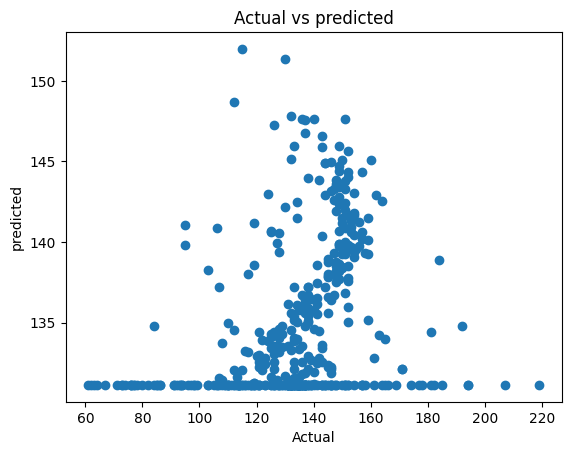

In [15]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, np.squeeze(model4.predict(X_test)) )
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title("Actual vs predicted")

In [16]:
y_prd=np.squeeze(np.squeeze(model4.predict(X_test)) )
predic_dif=pd.DataFrame({'Actual':Y_test,'predict':y_prd,"differences":Y_test-y_prd})
predic_dif[0:15]

14/14 [==============================] - 0s 1ms/step


,Actual,predict,differences
431,107,131.588547,-24.588547
610,125,134.097473,-9.097473
795,132,131.468735,0.531265
1238,157,144.333191,12.666809
1228,153,140.633026,12.366974
794,116,133.254456,-17.254456
642,128,134.632812,-6.632812
416,135,131.137634,3.862366
1410,115,151.978806,-36.978806
517,140,131.137634,8.862366


## keras tuner with RNN

In [87]:
from tensorflow import keras
from keras import layers
from keras.layers import Dense,LSTM,Dropout
from kerastuner.tuners import RandomSearch
def build_model(hp):
    model2= keras.Sequential()
    for i in range(hp.Int('num_layers',2,20)):
        model2.add(layers.LSTM(units=hp.Int('units_' + str(i),
                                           min_value=32,
                                           max_value=512,
                                           step=32),
                                           input_shape=(X_train.shape[1],1),
                              activation='relu'))
        model2.add(layers.Dense(1, activation='linear',name='Dense_1'))
        model2.compile(
              optimizer=keras.optimizers.Adam(
                 hp.Choice('learning rate', [1e-1,1e-2,1e-3,1e-4,1e-5])),
              loss='mean_absolute_error',
              metrics=['mean_absolute_error'])
        return model2

In [88]:
tuner=RandomSearch(build_model,objective='val_mean_absolute_error',max_trials=50, executions_per_trial=3,directory='project2',project_name='A2')

INFO:tensorflow:Reloading Oracle from existing project project2\A2\oracle.json
INFO:tensorflow:Reloading Tuner from project2\A2\tuner0.json


In [89]:
tuner.search(X_train,Y_train ,epochs=100,validation_data=(X_test,Y_test))

INFO:tensorflow:Oracle triggered exit


In [90]:
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

In [91]:
model5 = tuner.hypermodel.build(best_hps)
model5.fit(X_train, Y_train, epochs=2000,batch_size=32, validation_split=0.3)

Epoch 1/2000
22/22 [==============================] - 13s 141ms/step - loss: 56.2363 - mean_absolute_error: 56.2363 - val_loss: 15.4143 - val_mean_absolute_error: 15.4143
Epoch 2/2000
22/22 [==============================] - 1s 52ms/step - loss: 13.8792 - mean_absolute_error: 13.8792 - val_loss: 15.5229 - val_mean_absolute_error: 15.5229
Epoch 3/2000
22/22 [==============================] - 1s 46ms/step - loss: 13.4504 - mean_absolute_error: 13.4504 - val_loss: 13.3250 - val_mean_absolute_error: 13.3250
Epoch 4/2000
22/22 [==============================] - 1s 53ms/step - loss: 12.8299 - mean_absolute_error: 12.8299 - val_loss: 13.8696 - val_mean_absolute_error: 13.8696
Epoch 5/2000
22/22 [==============================] - 1s 50ms/step - loss: 13.4508 - mean_absolute_error: 13.4508 - val_loss: 13.9703 - val_mean_absolute_error: 13.9703
Epoch 6/2000
22/22 [==============================] - 1s 50ms/step - loss: 12.9360 - mean_absolute_error: 12.9360 - val_loss: 13.5526 - val_mean_absolute

22/22 [==============================] - 1s 45ms/step - loss: 12.7873 - mean_absolute_error: 12.7873 - val_loss: 13.8000 - val_mean_absolute_error: 13.8000
Epoch 98/2000
22/22 [==============================] - 1s 40ms/step - loss: 12.5194 - mean_absolute_error: 12.5194 - val_loss: 13.2544 - val_mean_absolute_error: 13.2544
Epoch 99/2000
22/22 [==============================] - 1s 46ms/step - loss: 12.6064 - mean_absolute_error: 12.6064 - val_loss: 13.3558 - val_mean_absolute_error: 13.3558
Epoch 100/2000
22/22 [==============================] - 1s 46ms/step - loss: 12.6663 - mean_absolute_error: 12.6663 - val_loss: 13.0390 - val_mean_absolute_error: 13.0390
Epoch 101/2000
22/22 [==============================] - 1s 42ms/step - loss: 12.8316 - mean_absolute_error: 12.8316 - val_loss: 13.6435 - val_mean_absolute_error: 13.6435
Epoch 102/2000
22/22 [==============================] - 1s 42ms/step - loss: 12.6614 - mean_absolute_error: 12.6614 - val_loss: 13.0221 - val_mean_absolute_error:

22/22 [==============================] - 1s 43ms/step - loss: 12.7547 - mean_absolute_error: 12.7547 - val_loss: 13.2998 - val_mean_absolute_error: 13.2998
Epoch 146/2000
22/22 [==============================] - 1s 46ms/step - loss: 12.5137 - mean_absolute_error: 12.5137 - val_loss: 13.1008 - val_mean_absolute_error: 13.1008
Epoch 147/2000
22/22 [==============================] - 1s 45ms/step - loss: 12.3919 - mean_absolute_error: 12.3919 - val_loss: 13.1474 - val_mean_absolute_error: 13.1474
Epoch 148/2000
22/22 [==============================] - 1s 46ms/step - loss: 12.3411 - mean_absolute_error: 12.3411 - val_loss: 14.1319 - val_mean_absolute_error: 14.1319
Epoch 149/2000
22/22 [==============================] - 1s 45ms/step - loss: 12.7597 - mean_absolute_error: 12.7597 - val_loss: 12.9745 - val_mean_absolute_error: 12.9745
Epoch 150/2000
22/22 [==============================] - 1s 41ms/step - loss: 12.4897 - mean_absolute_error: 12.4897 - val_loss: 14.7643 - val_mean_absolute_erro

Epoch 193/2000
22/22 [==============================] - 1s 52ms/step - loss: 12.4248 - mean_absolute_error: 12.4248 - val_loss: 11.9482 - val_mean_absolute_error: 11.9482
Epoch 194/2000
22/22 [==============================] - 1s 43ms/step - loss: 11.5642 - mean_absolute_error: 11.5642 - val_loss: 12.0816 - val_mean_absolute_error: 12.0816
Epoch 195/2000
22/22 [==============================] - 1s 41ms/step - loss: 11.7767 - mean_absolute_error: 11.7767 - val_loss: 11.6234 - val_mean_absolute_error: 11.6234
Epoch 196/2000
22/22 [==============================] - 1s 43ms/step - loss: 11.6292 - mean_absolute_error: 11.6292 - val_loss: 12.1762 - val_mean_absolute_error: 12.1762
Epoch 197/2000
22/22 [==============================] - 1s 39ms/step - loss: 11.6379 - mean_absolute_error: 11.6379 - val_loss: 12.0336 - val_mean_absolute_error: 12.0336
Epoch 198/2000
22/22 [==============================] - 1s 56ms/step - loss: 11.1469 - mean_absolute_error: 11.1469 - val_loss: 11.6626 - val_mea

Epoch 241/2000
22/22 [==============================] - 1s 43ms/step - loss: 10.7611 - mean_absolute_error: 10.7611 - val_loss: 10.9912 - val_mean_absolute_error: 10.9912
Epoch 242/2000
22/22 [==============================] - 1s 49ms/step - loss: 10.8843 - mean_absolute_error: 10.8843 - val_loss: 11.0704 - val_mean_absolute_error: 11.0704
Epoch 243/2000
22/22 [==============================] - 1s 47ms/step - loss: 10.8123 - mean_absolute_error: 10.8123 - val_loss: 10.9990 - val_mean_absolute_error: 10.9990
Epoch 244/2000
22/22 [==============================] - 1s 47ms/step - loss: 10.8491 - mean_absolute_error: 10.8491 - val_loss: 11.4149 - val_mean_absolute_error: 11.4149
Epoch 245/2000
22/22 [==============================] - 1s 42ms/step - loss: 11.4274 - mean_absolute_error: 11.4274 - val_loss: 13.2129 - val_mean_absolute_error: 13.2129
Epoch 246/2000
22/22 [==============================] - 1s 47ms/step - loss: 11.2354 - mean_absolute_error: 11.2354 - val_loss: 11.1011 - val_mea

Epoch 289/2000
22/22 [==============================] - 1s 43ms/step - loss: 10.4189 - mean_absolute_error: 10.4189 - val_loss: 10.5841 - val_mean_absolute_error: 10.5841
Epoch 290/2000
22/22 [==============================] - 1s 45ms/step - loss: 10.2280 - mean_absolute_error: 10.2280 - val_loss: 10.8646 - val_mean_absolute_error: 10.8646
Epoch 291/2000
22/22 [==============================] - 1s 42ms/step - loss: 10.3727 - mean_absolute_error: 10.3727 - val_loss: 10.7431 - val_mean_absolute_error: 10.7431
Epoch 292/2000
22/22 [==============================] - 1s 46ms/step - loss: 10.3389 - mean_absolute_error: 10.3389 - val_loss: 10.9586 - val_mean_absolute_error: 10.9586
Epoch 293/2000
22/22 [==============================] - 1s 46ms/step - loss: 10.3202 - mean_absolute_error: 10.3202 - val_loss: 10.9698 - val_mean_absolute_error: 10.9698
Epoch 294/2000
22/22 [==============================] - 1s 45ms/step - loss: 10.3367 - mean_absolute_error: 10.3367 - val_loss: 11.0075 - val_mea

Epoch 337/2000
22/22 [==============================] - 1s 51ms/step - loss: 10.4911 - mean_absolute_error: 10.4911 - val_loss: 10.9926 - val_mean_absolute_error: 10.9926
Epoch 338/2000
22/22 [==============================] - 1s 46ms/step - loss: 10.7982 - mean_absolute_error: 10.7982 - val_loss: 11.3160 - val_mean_absolute_error: 11.3160
Epoch 339/2000
22/22 [==============================] - 1s 43ms/step - loss: 10.8768 - mean_absolute_error: 10.8768 - val_loss: 11.6630 - val_mean_absolute_error: 11.6630
Epoch 340/2000
22/22 [==============================] - 1s 41ms/step - loss: 11.3076 - mean_absolute_error: 11.3076 - val_loss: 10.8932 - val_mean_absolute_error: 10.8932
Epoch 341/2000
22/22 [==============================] - 1s 43ms/step - loss: 10.3598 - mean_absolute_error: 10.3598 - val_loss: 10.5729 - val_mean_absolute_error: 10.5729
Epoch 342/2000
22/22 [==============================] - 1s 50ms/step - loss: 10.2039 - mean_absolute_error: 10.2039 - val_loss: 10.7262 - val_mea

Epoch 385/2000
22/22 [==============================] - 1s 51ms/step - loss: 10.3635 - mean_absolute_error: 10.3635 - val_loss: 10.5681 - val_mean_absolute_error: 10.5681
Epoch 386/2000
22/22 [==============================] - 1s 48ms/step - loss: 10.2981 - mean_absolute_error: 10.2981 - val_loss: 10.9270 - val_mean_absolute_error: 10.9270
Epoch 387/2000
22/22 [==============================] - 1s 48ms/step - loss: 10.4374 - mean_absolute_error: 10.4374 - val_loss: 10.9475 - val_mean_absolute_error: 10.9475
Epoch 388/2000
22/22 [==============================] - 1s 45ms/step - loss: 10.3878 - mean_absolute_error: 10.3878 - val_loss: 10.8884 - val_mean_absolute_error: 10.8884
Epoch 389/2000
22/22 [==============================] - 1s 45ms/step - loss: 10.2028 - mean_absolute_error: 10.2028 - val_loss: 10.7212 - val_mean_absolute_error: 10.7212
Epoch 390/2000
22/22 [==============================] - 1s 48ms/step - loss: 10.1979 - mean_absolute_error: 10.1979 - val_loss: 11.2589 - val_mea

Epoch 433/2000
22/22 [==============================] - 1s 45ms/step - loss: 10.0847 - mean_absolute_error: 10.0847 - val_loss: 10.6855 - val_mean_absolute_error: 10.6855
Epoch 434/2000
22/22 [==============================] - 1s 51ms/step - loss: 10.1452 - mean_absolute_error: 10.1452 - val_loss: 10.9793 - val_mean_absolute_error: 10.9793
Epoch 435/2000
22/22 [==============================] - 1s 50ms/step - loss: 10.1719 - mean_absolute_error: 10.1719 - val_loss: 11.0769 - val_mean_absolute_error: 11.0769
Epoch 436/2000
22/22 [==============================] - 1s 42ms/step - loss: 10.2644 - mean_absolute_error: 10.2644 - val_loss: 11.6397 - val_mean_absolute_error: 11.6397
Epoch 437/2000
22/22 [==============================] - 1s 47ms/step - loss: 10.8489 - mean_absolute_error: 10.8489 - val_loss: 11.3585 - val_mean_absolute_error: 11.3585
Epoch 438/2000
22/22 [==============================] - 1s 51ms/step - loss: 10.7519 - mean_absolute_error: 10.7519 - val_loss: 10.8795 - val_mea

Epoch 481/2000
22/22 [==============================] - 1s 50ms/step - loss: 10.4685 - mean_absolute_error: 10.4685 - val_loss: 10.9587 - val_mean_absolute_error: 10.9587
Epoch 482/2000
22/22 [==============================] - 1s 44ms/step - loss: 9.9004 - mean_absolute_error: 9.9004 - val_loss: 10.5182 - val_mean_absolute_error: 10.5182
Epoch 483/2000
22/22 [==============================] - 1s 45ms/step - loss: 9.8436 - mean_absolute_error: 9.8436 - val_loss: 10.3458 - val_mean_absolute_error: 10.3458
Epoch 484/2000
22/22 [==============================] - 1s 44ms/step - loss: 9.7014 - mean_absolute_error: 9.7014 - val_loss: 10.3467 - val_mean_absolute_error: 10.3467
Epoch 485/2000
22/22 [==============================] - 1s 46ms/step - loss: 9.7476 - mean_absolute_error: 9.7476 - val_loss: 10.4179 - val_mean_absolute_error: 10.4179
Epoch 486/2000
22/22 [==============================] - 1s 49ms/step - loss: 9.9356 - mean_absolute_error: 9.9356 - val_loss: 10.9567 - val_mean_absolute

22/22 [==============================] - 1s 39ms/step - loss: 10.0298 - mean_absolute_error: 10.0298 - val_loss: 10.0922 - val_mean_absolute_error: 10.0922
Epoch 578/2000
22/22 [==============================] - 1s 46ms/step - loss: 9.4941 - mean_absolute_error: 9.4941 - val_loss: 10.1136 - val_mean_absolute_error: 10.1136
Epoch 579/2000
22/22 [==============================] - 1s 48ms/step - loss: 9.6784 - mean_absolute_error: 9.6784 - val_loss: 9.7571 - val_mean_absolute_error: 9.7571
Epoch 580/2000
22/22 [==============================] - 1s 45ms/step - loss: 9.9293 - mean_absolute_error: 9.9293 - val_loss: 10.8304 - val_mean_absolute_error: 10.8304
Epoch 581/2000
22/22 [==============================] - 1s 48ms/step - loss: 9.6129 - mean_absolute_error: 9.6129 - val_loss: 10.4020 - val_mean_absolute_error: 10.4020
Epoch 582/2000
22/22 [==============================] - 1s 51ms/step - loss: 9.9010 - mean_absolute_error: 9.9010 - val_loss: 11.1850 - val_mean_absolute_error: 11.1850
E

Epoch 674/2000
22/22 [==============================] - 2s 72ms/step - loss: 9.4167 - mean_absolute_error: 9.4167 - val_loss: 9.5882 - val_mean_absolute_error: 9.5882
Epoch 675/2000
22/22 [==============================] - 2s 71ms/step - loss: 9.2558 - mean_absolute_error: 9.2558 - val_loss: 9.7706 - val_mean_absolute_error: 9.7706
Epoch 676/2000
22/22 [==============================] - 1s 62ms/step - loss: 9.4973 - mean_absolute_error: 9.4973 - val_loss: 9.7821 - val_mean_absolute_error: 9.7821
Epoch 677/2000
22/22 [==============================] - 1s 58ms/step - loss: 9.4087 - mean_absolute_error: 9.4087 - val_loss: 9.8189 - val_mean_absolute_error: 9.8189
Epoch 678/2000
22/22 [==============================] - 1s 57ms/step - loss: 9.2154 - mean_absolute_error: 9.2154 - val_loss: 9.6110 - val_mean_absolute_error: 9.6110
Epoch 679/2000
22/22 [==============================] - 1s 54ms/step - loss: 9.4188 - mean_absolute_error: 9.4188 - val_loss: 10.4467 - val_mean_absolute_error: 10.4

Epoch 723/2000
22/22 [==============================] - 1s 58ms/step - loss: 9.3742 - mean_absolute_error: 9.3742 - val_loss: 10.9289 - val_mean_absolute_error: 10.9289
Epoch 724/2000
22/22 [==============================] - 1s 59ms/step - loss: 9.3557 - mean_absolute_error: 9.3557 - val_loss: 9.9832 - val_mean_absolute_error: 9.9832
Epoch 725/2000
22/22 [==============================] - 2s 68ms/step - loss: 9.2031 - mean_absolute_error: 9.2031 - val_loss: 9.7365 - val_mean_absolute_error: 9.7365
Epoch 726/2000
22/22 [==============================] - 1s 62ms/step - loss: 9.1809 - mean_absolute_error: 9.1809 - val_loss: 9.7271 - val_mean_absolute_error: 9.7271
Epoch 727/2000
22/22 [==============================] - 2s 68ms/step - loss: 9.5139 - mean_absolute_error: 9.5139 - val_loss: 10.4620 - val_mean_absolute_error: 10.4620
Epoch 728/2000
22/22 [==============================] - 1s 64ms/step - loss: 9.4204 - mean_absolute_error: 9.4204 - val_loss: 10.8333 - val_mean_absolute_error: 

Epoch 772/2000
22/22 [==============================] - 1s 54ms/step - loss: 8.9047 - mean_absolute_error: 8.9047 - val_loss: 9.4735 - val_mean_absolute_error: 9.4735
Epoch 773/2000
22/22 [==============================] - 1s 68ms/step - loss: 9.3221 - mean_absolute_error: 9.3221 - val_loss: 9.5502 - val_mean_absolute_error: 9.5502
Epoch 774/2000
22/22 [==============================] - 1s 68ms/step - loss: 9.2032 - mean_absolute_error: 9.2032 - val_loss: 9.9591 - val_mean_absolute_error: 9.9591
Epoch 775/2000
22/22 [==============================] - 1s 53ms/step - loss: 9.4189 - mean_absolute_error: 9.4189 - val_loss: 10.2474 - val_mean_absolute_error: 10.2474
Epoch 776/2000
22/22 [==============================] - 1s 63ms/step - loss: 9.6216 - mean_absolute_error: 9.6216 - val_loss: 10.7112 - val_mean_absolute_error: 10.7112
Epoch 777/2000
22/22 [==============================] - 1s 59ms/step - loss: 9.5045 - mean_absolute_error: 9.5045 - val_loss: 9.7439 - val_mean_absolute_error: 9

Epoch 821/2000
22/22 [==============================] - 2s 74ms/step - loss: 9.1601 - mean_absolute_error: 9.1601 - val_loss: 10.4208 - val_mean_absolute_error: 10.4208
Epoch 822/2000
22/22 [==============================] - 2s 75ms/step - loss: 8.9880 - mean_absolute_error: 8.9880 - val_loss: 9.3552 - val_mean_absolute_error: 9.3552
Epoch 823/2000
22/22 [==============================] - 1s 67ms/step - loss: 9.4467 - mean_absolute_error: 9.4467 - val_loss: 10.1680 - val_mean_absolute_error: 10.1680
Epoch 824/2000
22/22 [==============================] - 1s 68ms/step - loss: 9.0762 - mean_absolute_error: 9.0762 - val_loss: 9.8052 - val_mean_absolute_error: 9.8052
Epoch 825/2000
22/22 [==============================] - 1s 63ms/step - loss: 9.0993 - mean_absolute_error: 9.0993 - val_loss: 9.5125 - val_mean_absolute_error: 9.5125
Epoch 826/2000
22/22 [==============================] - 1s 64ms/step - loss: 9.2314 - mean_absolute_error: 9.2314 - val_loss: 10.5239 - val_mean_absolute_error: 

Epoch 870/2000
22/22 [==============================] - 1s 66ms/step - loss: 9.5284 - mean_absolute_error: 9.5284 - val_loss: 9.5899 - val_mean_absolute_error: 9.5899
Epoch 871/2000
22/22 [==============================] - 1s 62ms/step - loss: 9.1858 - mean_absolute_error: 9.1858 - val_loss: 9.2797 - val_mean_absolute_error: 9.2797
Epoch 872/2000
22/22 [==============================] - 1s 55ms/step - loss: 9.0735 - mean_absolute_error: 9.0735 - val_loss: 9.5263 - val_mean_absolute_error: 9.5263
Epoch 873/2000
22/22 [==============================] - 1s 68ms/step - loss: 8.8731 - mean_absolute_error: 8.8731 - val_loss: 9.8316 - val_mean_absolute_error: 9.8316
Epoch 874/2000
22/22 [==============================] - 1s 70ms/step - loss: 9.1670 - mean_absolute_error: 9.1670 - val_loss: 9.4418 - val_mean_absolute_error: 9.4418
Epoch 875/2000
22/22 [==============================] - 2s 70ms/step - loss: 8.8235 - mean_absolute_error: 8.8235 - val_loss: 9.3571 - val_mean_absolute_error: 9.357

Epoch 919/2000
22/22 [==============================] - 1s 58ms/step - loss: 8.9182 - mean_absolute_error: 8.9182 - val_loss: 10.2303 - val_mean_absolute_error: 10.2303
Epoch 920/2000
22/22 [==============================] - 1s 61ms/step - loss: 9.0775 - mean_absolute_error: 9.0775 - val_loss: 9.4179 - val_mean_absolute_error: 9.4179
Epoch 921/2000
22/22 [==============================] - 1s 60ms/step - loss: 8.9991 - mean_absolute_error: 8.9991 - val_loss: 9.7760 - val_mean_absolute_error: 9.7760
Epoch 922/2000
22/22 [==============================] - 1s 62ms/step - loss: 8.9035 - mean_absolute_error: 8.9035 - val_loss: 9.8380 - val_mean_absolute_error: 9.8380
Epoch 923/2000
22/22 [==============================] - 1s 68ms/step - loss: 9.0704 - mean_absolute_error: 9.0704 - val_loss: 9.7417 - val_mean_absolute_error: 9.7417
Epoch 924/2000
22/22 [==============================] - 1s 62ms/step - loss: 8.8307 - mean_absolute_error: 8.8307 - val_loss: 9.9460 - val_mean_absolute_error: 9.9

Epoch 968/2000
22/22 [==============================] - 2s 74ms/step - loss: 8.8285 - mean_absolute_error: 8.8285 - val_loss: 9.7118 - val_mean_absolute_error: 9.7118
Epoch 969/2000
22/22 [==============================] - 2s 79ms/step - loss: 8.9310 - mean_absolute_error: 8.9310 - val_loss: 10.0782 - val_mean_absolute_error: 10.0782
Epoch 970/2000
22/22 [==============================] - 1s 67ms/step - loss: 8.9190 - mean_absolute_error: 8.9190 - val_loss: 9.8979 - val_mean_absolute_error: 9.8979
Epoch 971/2000
22/22 [==============================] - 1s 63ms/step - loss: 8.7184 - mean_absolute_error: 8.7184 - val_loss: 9.7592 - val_mean_absolute_error: 9.7592
Epoch 972/2000
22/22 [==============================] - 1s 67ms/step - loss: 8.8318 - mean_absolute_error: 8.8318 - val_loss: 9.4567 - val_mean_absolute_error: 9.4567
Epoch 973/2000
22/22 [==============================] - 1s 57ms/step - loss: 8.8290 - mean_absolute_error: 8.8290 - val_loss: 9.7967 - val_mean_absolute_error: 9.7

Epoch 1017/2000
22/22 [==============================] - 2s 83ms/step - loss: 9.1352 - mean_absolute_error: 9.1352 - val_loss: 9.4208 - val_mean_absolute_error: 9.4208
Epoch 1018/2000
22/22 [==============================] - 2s 72ms/step - loss: 9.7842 - mean_absolute_error: 9.7842 - val_loss: 11.5338 - val_mean_absolute_error: 11.5338
Epoch 1019/2000
22/22 [==============================] - 2s 73ms/step - loss: 9.5996 - mean_absolute_error: 9.5996 - val_loss: 9.4354 - val_mean_absolute_error: 9.4354
Epoch 1020/2000
22/22 [==============================] - 1s 67ms/step - loss: 9.2655 - mean_absolute_error: 9.2655 - val_loss: 9.8645 - val_mean_absolute_error: 9.8645
Epoch 1021/2000
22/22 [==============================] - 1s 64ms/step - loss: 8.9623 - mean_absolute_error: 8.9623 - val_loss: 10.0260 - val_mean_absolute_error: 10.0260
Epoch 1022/2000
22/22 [==============================] - 1s 64ms/step - loss: 9.2004 - mean_absolute_error: 9.2004 - val_loss: 9.3822 - val_mean_absolute_er

Epoch 1114/2000
22/22 [==============================] - 1s 66ms/step - loss: 8.8240 - mean_absolute_error: 8.8240 - val_loss: 9.5584 - val_mean_absolute_error: 9.5584
Epoch 1115/2000
22/22 [==============================] - 1s 66ms/step - loss: 9.3355 - mean_absolute_error: 9.3355 - val_loss: 9.8807 - val_mean_absolute_error: 9.8807
Epoch 1116/2000
22/22 [==============================] - 1s 70ms/step - loss: 9.0416 - mean_absolute_error: 9.0416 - val_loss: 9.5433 - val_mean_absolute_error: 9.5433
Epoch 1117/2000
22/22 [==============================] - 2s 75ms/step - loss: 9.1664 - mean_absolute_error: 9.1664 - val_loss: 10.0409 - val_mean_absolute_error: 10.0409
Epoch 1118/2000
22/22 [==============================] - 1s 61ms/step - loss: 9.0220 - mean_absolute_error: 9.0220 - val_loss: 9.9739 - val_mean_absolute_error: 9.9739
Epoch 1119/2000
22/22 [==============================] - 2s 74ms/step - loss: 8.9939 - mean_absolute_error: 8.9939 - val_loss: 9.6243 - val_mean_absolute_erro

Epoch 1211/2000
22/22 [==============================] - 1s 57ms/step - loss: 8.7247 - mean_absolute_error: 8.7247 - val_loss: 9.4675 - val_mean_absolute_error: 9.4675
Epoch 1212/2000
22/22 [==============================] - 1s 56ms/step - loss: 8.7988 - mean_absolute_error: 8.7988 - val_loss: 9.5919 - val_mean_absolute_error: 9.5919
Epoch 1213/2000
22/22 [==============================] - 1s 63ms/step - loss: 8.7017 - mean_absolute_error: 8.7017 - val_loss: 9.3599 - val_mean_absolute_error: 9.3599
Epoch 1214/2000
22/22 [==============================] - 1s 65ms/step - loss: 9.1431 - mean_absolute_error: 9.1431 - val_loss: 9.7565 - val_mean_absolute_error: 9.7565
Epoch 1215/2000
22/22 [==============================] - 2s 74ms/step - loss: 8.8324 - mean_absolute_error: 8.8324 - val_loss: 9.5067 - val_mean_absolute_error: 9.5067
Epoch 1216/2000
22/22 [==============================] - 1s 64ms/step - loss: 8.9170 - mean_absolute_error: 8.9170 - val_loss: 9.9382 - val_mean_absolute_error:

Epoch 1308/2000
22/22 [==============================] - 1s 69ms/step - loss: 8.7204 - mean_absolute_error: 8.7204 - val_loss: 9.7819 - val_mean_absolute_error: 9.7819
Epoch 1309/2000
22/22 [==============================] - 1s 68ms/step - loss: 8.7384 - mean_absolute_error: 8.7384 - val_loss: 10.5109 - val_mean_absolute_error: 10.5109
Epoch 1310/2000
22/22 [==============================] - 1s 58ms/step - loss: 8.8862 - mean_absolute_error: 8.8862 - val_loss: 10.0226 - val_mean_absolute_error: 10.0226
Epoch 1311/2000
22/22 [==============================] - 2s 71ms/step - loss: 8.8474 - mean_absolute_error: 8.8474 - val_loss: 9.4398 - val_mean_absolute_error: 9.4398
Epoch 1312/2000
22/22 [==============================] - 1s 70ms/step - loss: 9.0292 - mean_absolute_error: 9.0292 - val_loss: 9.9711 - val_mean_absolute_error: 9.9711
Epoch 1313/2000
22/22 [==============================] - 2s 70ms/step - loss: 8.9225 - mean_absolute_error: 8.9225 - val_loss: 9.4307 - val_mean_absolute_er

22/22 [==============================] - 1s 64ms/step - loss: 8.8039 - mean_absolute_error: 8.8039 - val_loss: 10.6293 - val_mean_absolute_error: 10.6293
Epoch 1405/2000
22/22 [==============================] - 1s 61ms/step - loss: 8.8570 - mean_absolute_error: 8.8570 - val_loss: 9.6727 - val_mean_absolute_error: 9.6727
Epoch 1406/2000
22/22 [==============================] - 1s 58ms/step - loss: 8.6115 - mean_absolute_error: 8.6115 - val_loss: 10.1583 - val_mean_absolute_error: 10.1583
Epoch 1407/2000
22/22 [==============================] - 2s 67ms/step - loss: 9.0264 - mean_absolute_error: 9.0264 - val_loss: 10.0963 - val_mean_absolute_error: 10.0963
Epoch 1408/2000
22/22 [==============================] - 2s 68ms/step - loss: 8.7233 - mean_absolute_error: 8.7233 - val_loss: 10.1745 - val_mean_absolute_error: 10.1745
Epoch 1409/2000
22/22 [==============================] - 2s 76ms/step - loss: 8.8685 - mean_absolute_error: 8.8685 - val_loss: 9.5251 - val_mean_absolute_error: 9.5251


22/22 [==============================] - 1s 60ms/step - loss: 8.8860 - mean_absolute_error: 8.8860 - val_loss: 9.4356 - val_mean_absolute_error: 9.4356
Epoch 1501/2000
22/22 [==============================] - 1s 61ms/step - loss: 8.9279 - mean_absolute_error: 8.9279 - val_loss: 10.1503 - val_mean_absolute_error: 10.1503
Epoch 1502/2000
22/22 [==============================] - 1s 63ms/step - loss: 9.2174 - mean_absolute_error: 9.2174 - val_loss: 10.4482 - val_mean_absolute_error: 10.4482
Epoch 1503/2000
22/22 [==============================] - 2s 85ms/step - loss: 8.7586 - mean_absolute_error: 8.7586 - val_loss: 9.9965 - val_mean_absolute_error: 9.9965
Epoch 1504/2000
22/22 [==============================] - 1s 59ms/step - loss: 8.5981 - mean_absolute_error: 8.5981 - val_loss: 9.7368 - val_mean_absolute_error: 9.7368
Epoch 1505/2000
22/22 [==============================] - 2s 69ms/step - loss: 8.7902 - mean_absolute_error: 8.7902 - val_loss: 11.0929 - val_mean_absolute_error: 11.0929
Ep

Epoch 1597/2000
22/22 [==============================] - 2s 81ms/step - loss: 8.8488 - mean_absolute_error: 8.8488 - val_loss: 10.3520 - val_mean_absolute_error: 10.3520
Epoch 1598/2000
22/22 [==============================] - 1s 62ms/step - loss: 9.4267 - mean_absolute_error: 9.4267 - val_loss: 11.8692 - val_mean_absolute_error: 11.8692
Epoch 1599/2000
22/22 [==============================] - 2s 77ms/step - loss: 8.9990 - mean_absolute_error: 8.9990 - val_loss: 10.3844 - val_mean_absolute_error: 10.3844
Epoch 1600/2000
22/22 [==============================] - 1s 60ms/step - loss: 8.6954 - mean_absolute_error: 8.6954 - val_loss: 9.9722 - val_mean_absolute_error: 9.9722
Epoch 1601/2000
22/22 [==============================] - 2s 73ms/step - loss: 8.8679 - mean_absolute_error: 8.8679 - val_loss: 10.3480 - val_mean_absolute_error: 10.3480
Epoch 1602/2000
22/22 [==============================] - 2s 82ms/step - loss: 8.7050 - mean_absolute_error: 8.7050 - val_loss: 10.2304 - val_mean_absolu

Epoch 1694/2000
22/22 [==============================] - 1s 51ms/step - loss: 8.7809 - mean_absolute_error: 8.7809 - val_loss: 10.4115 - val_mean_absolute_error: 10.4115
Epoch 1695/2000
22/22 [==============================] - 1s 45ms/step - loss: 8.8846 - mean_absolute_error: 8.8846 - val_loss: 10.6078 - val_mean_absolute_error: 10.6078
Epoch 1696/2000
22/22 [==============================] - 1s 63ms/step - loss: 8.9891 - mean_absolute_error: 8.9891 - val_loss: 10.5390 - val_mean_absolute_error: 10.5390
Epoch 1697/2000
22/22 [==============================] - 1s 45ms/step - loss: 9.0963 - mean_absolute_error: 9.0963 - val_loss: 10.3711 - val_mean_absolute_error: 10.3711
Epoch 1698/2000
22/22 [==============================] - 1s 52ms/step - loss: 8.8378 - mean_absolute_error: 8.8378 - val_loss: 10.5311 - val_mean_absolute_error: 10.5311
Epoch 1699/2000
22/22 [==============================] - 1s 49ms/step - loss: 8.5391 - mean_absolute_error: 8.5391 - val_loss: 10.0466 - val_mean_abso

Epoch 1791/2000
22/22 [==============================] - 1s 40ms/step - loss: 8.5723 - mean_absolute_error: 8.5723 - val_loss: 9.6355 - val_mean_absolute_error: 9.6355
Epoch 1792/2000
22/22 [==============================] - 1s 44ms/step - loss: 8.6290 - mean_absolute_error: 8.6290 - val_loss: 9.4542 - val_mean_absolute_error: 9.4542
Epoch 1793/2000
22/22 [==============================] - 1s 46ms/step - loss: 8.4870 - mean_absolute_error: 8.4870 - val_loss: 9.7104 - val_mean_absolute_error: 9.7104
Epoch 1794/2000
22/22 [==============================] - 1s 44ms/step - loss: 8.7486 - mean_absolute_error: 8.7486 - val_loss: 10.3613 - val_mean_absolute_error: 10.3613
Epoch 1795/2000
22/22 [==============================] - 1s 43ms/step - loss: 8.8200 - mean_absolute_error: 8.8200 - val_loss: 9.9235 - val_mean_absolute_error: 9.9235
Epoch 1796/2000
22/22 [==============================] - 1s 53ms/step - loss: 8.5094 - mean_absolute_error: 8.5094 - val_loss: 9.7475 - val_mean_absolute_erro

Epoch 1888/2000
22/22 [==============================] - 1s 46ms/step - loss: 8.6344 - mean_absolute_error: 8.6344 - val_loss: 10.1625 - val_mean_absolute_error: 10.1625
Epoch 1889/2000
22/22 [==============================] - 1s 48ms/step - loss: 8.5550 - mean_absolute_error: 8.5550 - val_loss: 9.4789 - val_mean_absolute_error: 9.4789
Epoch 1890/2000
22/22 [==============================] - 1s 42ms/step - loss: 8.4028 - mean_absolute_error: 8.4028 - val_loss: 9.6128 - val_mean_absolute_error: 9.6128
Epoch 1891/2000
22/22 [==============================] - 1s 36ms/step - loss: 8.5231 - mean_absolute_error: 8.5231 - val_loss: 9.6450 - val_mean_absolute_error: 9.6450
Epoch 1892/2000
22/22 [==============================] - 1s 43ms/step - loss: 8.5166 - mean_absolute_error: 8.5166 - val_loss: 9.6723 - val_mean_absolute_error: 9.6723
Epoch 1893/2000
22/22 [==============================] - 1s 52ms/step - loss: 8.4668 - mean_absolute_error: 8.4668 - val_loss: 10.3368 - val_mean_absolute_err

Epoch 1985/2000
22/22 [==============================] - 1s 48ms/step - loss: 8.4689 - mean_absolute_error: 8.4689 - val_loss: 9.2509 - val_mean_absolute_error: 9.2509
Epoch 1986/2000
22/22 [==============================] - 1s 45ms/step - loss: 8.4009 - mean_absolute_error: 8.4009 - val_loss: 10.5454 - val_mean_absolute_error: 10.5454
Epoch 1987/2000
22/22 [==============================] - 1s 44ms/step - loss: 8.7152 - mean_absolute_error: 8.7152 - val_loss: 9.5165 - val_mean_absolute_error: 9.5165
Epoch 1988/2000
22/22 [==============================] - 1s 42ms/step - loss: 8.4316 - mean_absolute_error: 8.4316 - val_loss: 9.5415 - val_mean_absolute_error: 9.5415
Epoch 1989/2000
22/22 [==============================] - 1s 41ms/step - loss: 8.4678 - mean_absolute_error: 8.4678 - val_loss: 9.6641 - val_mean_absolute_error: 9.6641
Epoch 1990/2000
22/22 [==============================] - 1s 43ms/step - loss: 8.6041 - mean_absolute_error: 8.6041 - val_loss: 10.1422 - val_mean_absolute_err

In [92]:
import numpy as np
from sklearn.metrics import r2_score
r2_score(Y_test, np.squeeze(model5.predict(X_test)) )

14/14 [==============================] - 1s 11ms/step


0.1195125515938289

In [93]:
prediction =np.squeeze(model5.predict([[80,2,2,129]]))
print("Prediction: {}".format(prediction))

1/1 [==============================] - 1s 1s/step
Prediction: 86.76297760009766


In [94]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse= mean_squared_error(Y_test, np.squeeze(model5.predict(X_test)) )
mae= mean_absolute_error(Y_test, np.squeeze(model5.predict(X_test)) )
print('mean squired error:', mse)
print('mean absolute error:', mae)

14/14 [==============================] - 0s 14ms/step
mean squired error: 451.93725115404243
mean absolute error: 13.465503226983156


14/14 [==============================] - 0s 13ms/step


Text(0.5, 1.0, 'Actual vs predicted')

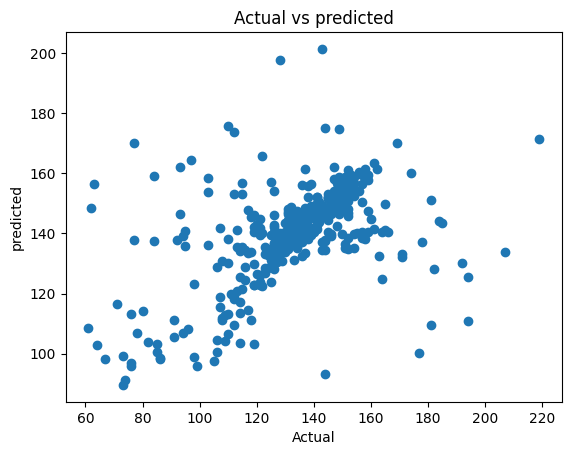

In [95]:
import matplotlib.pyplot as plt
plt.scatter(Y_test, np.squeeze(model5.predict(X_test)) )
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title("Actual vs predicted")

In [96]:
y_prd=np.squeeze(np.squeeze(model5.predict(X_test)) )
predic_dif=pd.DataFrame({'Actual':Y_test,'predict':y_prd,"differences":Y_test-y_prd})
predic_dif[0:15]

14/14 [==============================] - 0s 12ms/step


,Actual,predict,differences
431,107,118.887215,-11.887215
610,125,131.907974,-6.907974
795,132,137.625885,-5.625885
1238,157,150.476624,6.523376
1228,153,154.498718,-1.498718
794,116,128.720795,-12.720795
642,128,133.625137,-5.625137
416,135,144.477524,-9.477524
1410,115,135.366394,-20.366394
517,140,146.159042,-6.159042
